Hi. Welcome to my dataset, we're going to get to know parts of it a bit better by the end of this notebook. 

I obtained this dataset from Nathan Fiala's website (http://nathanfiala.com/research/). It was collected and analyzed as part of a study on the impact of unsupervised business grants to groups of young entrepreneurs in northern Uganda. The key outcomes were individual earnings, shifts from agricultural labor to skilled trades, and entry into the formal sector. The authors conducted a randomized control trial, where the intervention was randomized at the group level, in order to identify the causal effect of the grants. The grants were given out as part of the Youth Opportunities Program (YOP), a government program in Uganda. The original paper can be found here: http://nathanfiala.com/wp-content/uploads/2016/05/Generating-skilled-self-employmen.pdf . Thanks very much to the authors for making their data available online. Alright, let's check out the data!

- Sam Manning

In [215]:
#First, I'm going to get set up with numpy, pandas, and other packages I might want to use to
#explore and visualize my data. 

# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.plotly as py

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [216]:
#reading my stata file and creating pandas data frame

df = pd.read_stata ('/Users/sammanning/desktop/ECON628-01-sjmanning/datasets/yop_analysis.dta')

In [217]:
# Making sure the dataset got uploaded ok by first looking at the head of the dataset
df.head(10)

,partid,groupid,district,admin_cost_us,group_female,assigned,treated,ind_found_b,ind_found_e1,ind_found_e2,...,consumption_real_p99_z_e,net_hhtransfers_p99_e,adjusted_profits2_e,wages_e,ngogovtransfer_e,anytransferlikely_e,yop_prob,pop_weight1,pop_weight2,A_yop_prob
0,1003.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.816520,NaN,NaN,0.816520
1,1003.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,NaN,1.0,...,1.600841,NaN,570.630737,2.258611,0.0,1.0,0.816520,0.021719,0.078326,0.816520
2,1004.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,1.0,NaN,...,NaN,-50.049999,8.042051,0.745156,0.0,NaN,0.361856,0.048688,0.161566,0.361856
3,1004.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.361856,NaN,NaN,0.361856
4,1011.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,1.0,NaN,...,NaN,0.000000,8.964286,0.264410,0.0,NaN,0.401019,0.043042,0.147859,0.401019
5,1011.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,NaN,1.0,...,-0.141504,NaN,81.420509,0.570299,0.0,1.0,0.401019,0.043042,0.147859,0.401019
6,1013.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,1.0,NaN,...,NaN,20.000000,217.248840,1.113685,0.0,NaN,0.846650,0.020758,0.072735,0.846650
7,1013.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,NaN,1.0,...,-0.646108,NaN,314.304138,6.211180,0.0,1.0,0.846650,0.020758,0.072735,0.846650
8,1015.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.569301,NaN,NaN,0.569301
9,1015.0,1,ADJUMANI,5810.575195,0.0,1,0.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.569301,NaN,NaN,0.569301


In [218]:
# There are lots of variables (columns) that won't be very helpful here. I'm going to get rid of some of
# them to make the dataset a bit cleaner to work with. 

df = df.drop(["age_2","age_3","ldmcomother","ingroup_hetero","ingroup_dynamic", "live_together_e", "ppmedwait_time_e", "pptaskfirst_time_e","wbyelledtodo_resc_e", "migrate_e"],axis=1)

In [219]:
df['treated'] 

#Checking to see how the treated variable is coded. Looks like it is 1 if treated, 0 if not.


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
5324    0.0
5325    0.0
5326    0.0
5327    0.0
5328    0.0
5329    0.0
5330    0.0
5331    0.0
5332    0.0
5333    0.0
5334    0.0
5335    0.0
5336    0.0
5337    0.0
5338    0.0
5339    0.0
5340    0.0
5341    0.0
5342    0.0
5343    0.0
5344    0.0
5345    0.0
5346    0.0
5347    0.0
5348    0.0
5349    0.0
5350    0.0
5351    0.0
5352    0.0
5353    0.0
Name: treated, dtype: float32

In [220]:
#Print the tail - last ten rows of the df

df.tail(10) 

,partid,groupid,district,admin_cost_us,group_female,assigned,treated,ind_found_b,ind_found_e1,ind_found_e2,...,consumption_real_p99_z_e,net_hhtransfers_p99_e,adjusted_profits2_e,wages_e,ngogovtransfer_e,anytransferlikely_e,yop_prob,pop_weight1,pop_weight2,A_yop_prob
5344,9994001.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5345,9994001.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5346,9994004.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5347,9994004.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5348,9994992.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349,9994992.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5350,9994993.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5351,9994993.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5352,9994995.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5353,9994995.0,9994,MOROTO,5055.200684,1.0,0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
#displaying summary statistics for the whole dataset

df.describe()

,partid,groupid,admin_cost_us,group_female,assigned,treated,ind_found_b,ind_found_e1,ind_found_e2,ind_unfound_e1,...,consumption_real_p99_z_e,net_hhtransfers_p99_e,adjusted_profits2_e,wages_e,ngogovtransfer_e,anytransferlikely_e,yop_prob,pop_weight1,pop_weight2,A_yop_prob
count,5.354000e+03,5354.000000,5354.000000,5334.000000,5354.000000,5354.000000,5354.000000,2677.000000,2677.000000,2677.000000,...,1.862000e+03,2005.000000,3869.000000,3637.000000,3873.000000,1868.000000,4958.000000,3959.000000,3499.000000,4958.000000
mean,3.508347e+05,350.807620,7387.975586,0.389660,0.494957,0.440792,0.970489,0.748973,0.697796,0.251027,...,5.794007e-09,2.025810,43.548668,0.625697,0.106636,0.755889,0.583674,0.057058,0.171976,0.297212
std,8.552280e+05,855.171889,2124.273926,0.254255,0.500021,0.496538,0.169250,0.433689,0.459301,0.433689,...,1.000000e+00,91.651337,127.632439,3.214638,0.308692,0.429677,0.247795,0.111830,0.306371,0.340169
min,1.003000e+03,1.000000,464.846008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.427217e+00,-500.000000,-128.741821,0.000000,0.000000,0.000000,0.000282,0.017697,0.062722,0.000000
25%,1.360120e+05,136.000000,5810.575195,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.700080e+05,270.000000,7520.627441,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.120010e+05,412.000000,8814.642578,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.994995e+06,9994.000000,14428.471680,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.396764e+00,600.000000,935.760376,122.950821,1.000000,1.000000,0.994956,2.600998,6.524622,0.994956


In [222]:
#looks as though there are a substantial number of missing values, so I'll need to be careful how I address those
#for the variables I want to explore.

In [223]:
# Looking at the variable for education. Highest grade level completed is denoted in the dataset. 

df['education']

0        7.0
1        7.0
2        9.0
3        9.0
4        8.0
5        8.0
6       10.0
7       10.0
8        6.0
9        6.0
10       4.0
11       4.0
12      13.0
13      13.0
14      11.0
15      11.0
16       6.0
17       6.0
18       7.0
19       7.0
20       7.0
21       7.0
22      13.0
23      13.0
24       6.0
25       6.0
26       2.0
27       2.0
28       7.0
29       7.0
        ... 
5324     7.0
5325     7.0
5326     7.0
5327     7.0
5328     7.0
5329     7.0
5330     7.0
5331     7.0
5332     7.0
5333     7.0
5334     7.0
5335     7.0
5336     7.0
5337     7.0
5338     7.0
5339     7.0
5340     7.0
5341     7.0
5342     7.0
5343     7.0
5344     7.0
5345     7.0
5346     7.0
5347     7.0
5348     7.0
5349     7.0
5350     7.0
5351     7.0
5352     7.0
5353     7.0
Name: education, dtype: float32

In [224]:
#Trying to see how a few of the baseline characteristics are measured in the dataset. 
#Literate is a dummy 1 for high level of literacy, 0 for low level. 
#Dummies are also used to tell us if the observations in the sample have previously enrolled in
#vocational training, if they are currenlty in school, or if the currently practice a vocation. 
df.iloc[:,40:44]

,literate,voc_training,inschool,emplvoc
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [225]:
# Checking out the variable types that I am working with. 
df.dtypes

partid                       float64
groupid                        int16
district                      object
admin_cost_us                float32
group_female                 float32
assigned                       int16
treated                      float32
ind_found_b                  float32
ind_found_e1                 float32
ind_found_e2                 float32
ind_unfound_e1               float32
ind_unfound_p1_e1            float32
ind_unfound_e2               float32
ind_unfound_p1_e2            float32
group_existed                float32
group_age                    float32
group_size                   float32
group_roster_size            float32
grp_leader                   float32
grp_chair                    float32
loan_100k                   category
loan_1mil                   category
jumpy                       category
q157                        category
q162                        category
quarrelsome                 category
unloved                     category
q

In [226]:
#Taking a look at some baseline variables to learn more about the individuals and groups that
#make up the dataset.
df.education.describe()
#Average member of the sample has completed about 8 grades of school.

count    5354.000000
mean        7.858797
std         2.938623
min         0.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        14.000000
Name: education, dtype: float64

In [227]:
df.group_female.describe()
#about 39% of the entrepreneurs in the sample groups are female

count    5334.000000
mean        0.389660
std         0.254255
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max         1.000000
Name: group_female, dtype: float64

In [228]:
#On average, how long has each group of entrepreneurs in the sample existed for?
df.group_age.describe()


count    5354.000000
mean        3.792678
std         1.923229
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        18.000000
Name: group_age, dtype: float64

In [229]:
#Nearly 4 years. It seems like 18 is an outlier here based on the mean and std,
#let's check to see what the distribution looks like by plotting a histogram.

In [230]:
#defining a function to plot histograms

def histogram_plotter(title, data):
   sns.set(rc={"figure.figsize": (8, 6)})
   sns.set_style('white')
   dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
   
   dist.axvline(np.mean(data), lw=1, c='green', ls='dashed')
   average_roll = '{0:.2f}'.format(np.mean(data))
   title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
   dist.set_title(title, fontsize=16)
   dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':1})

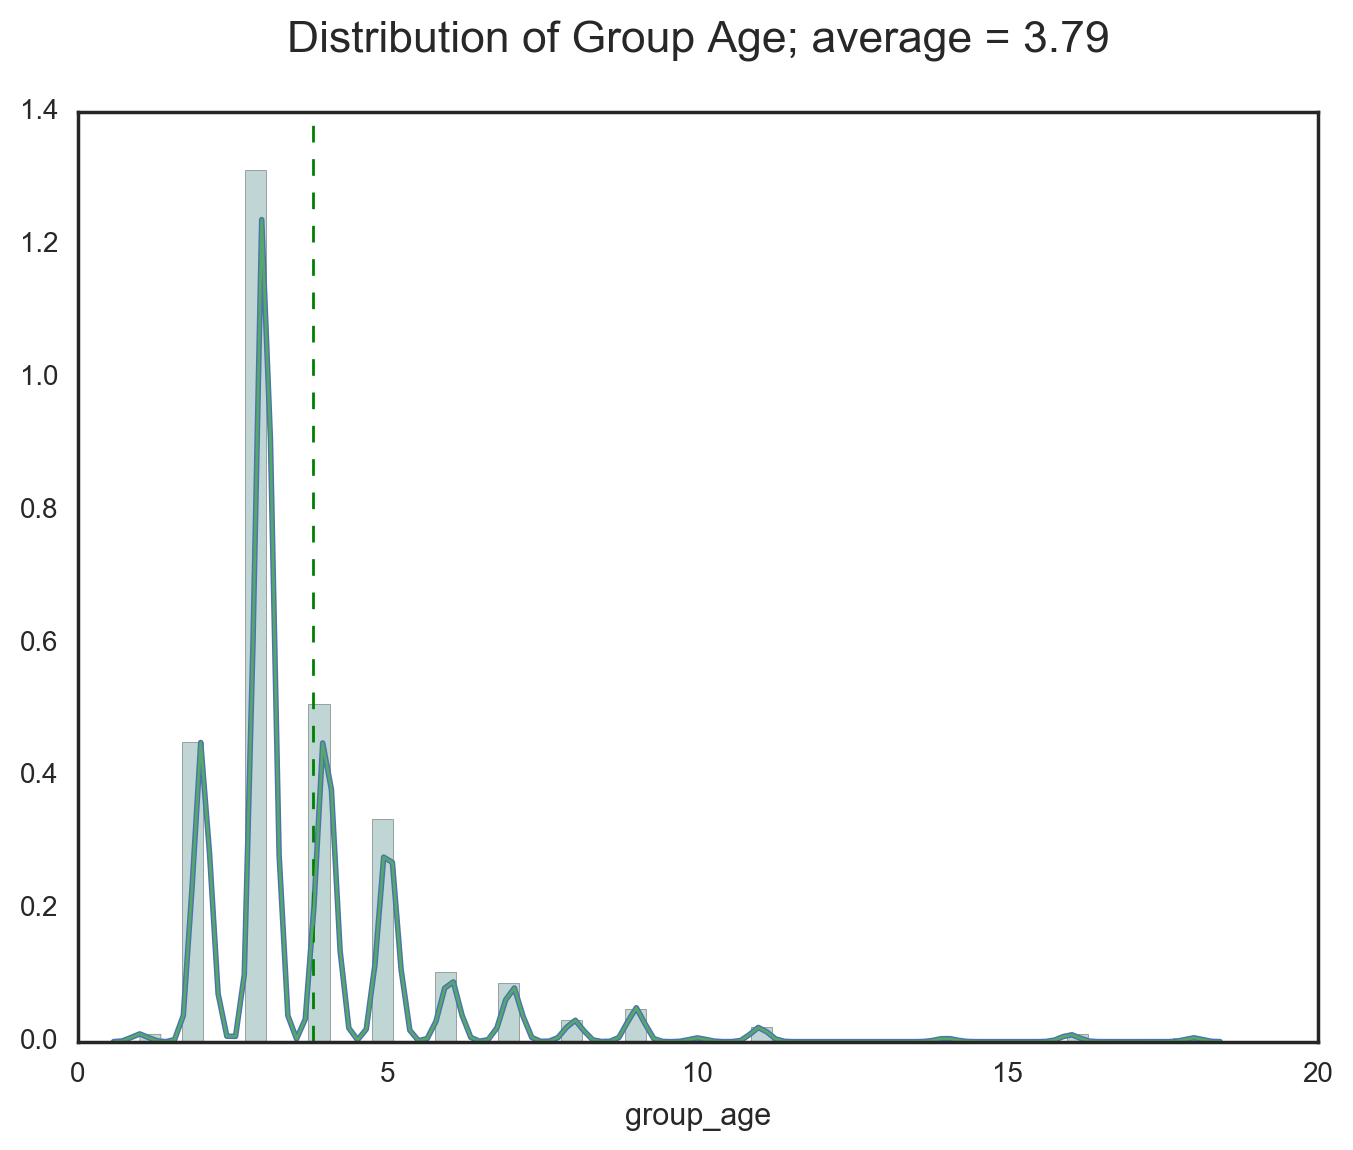

In [231]:
histogram_plotter("Group Age", df.group_age)

In [232]:
#That's not the most appealing graph for this data, 
#I'm going to try some different code to make it look cleaner.

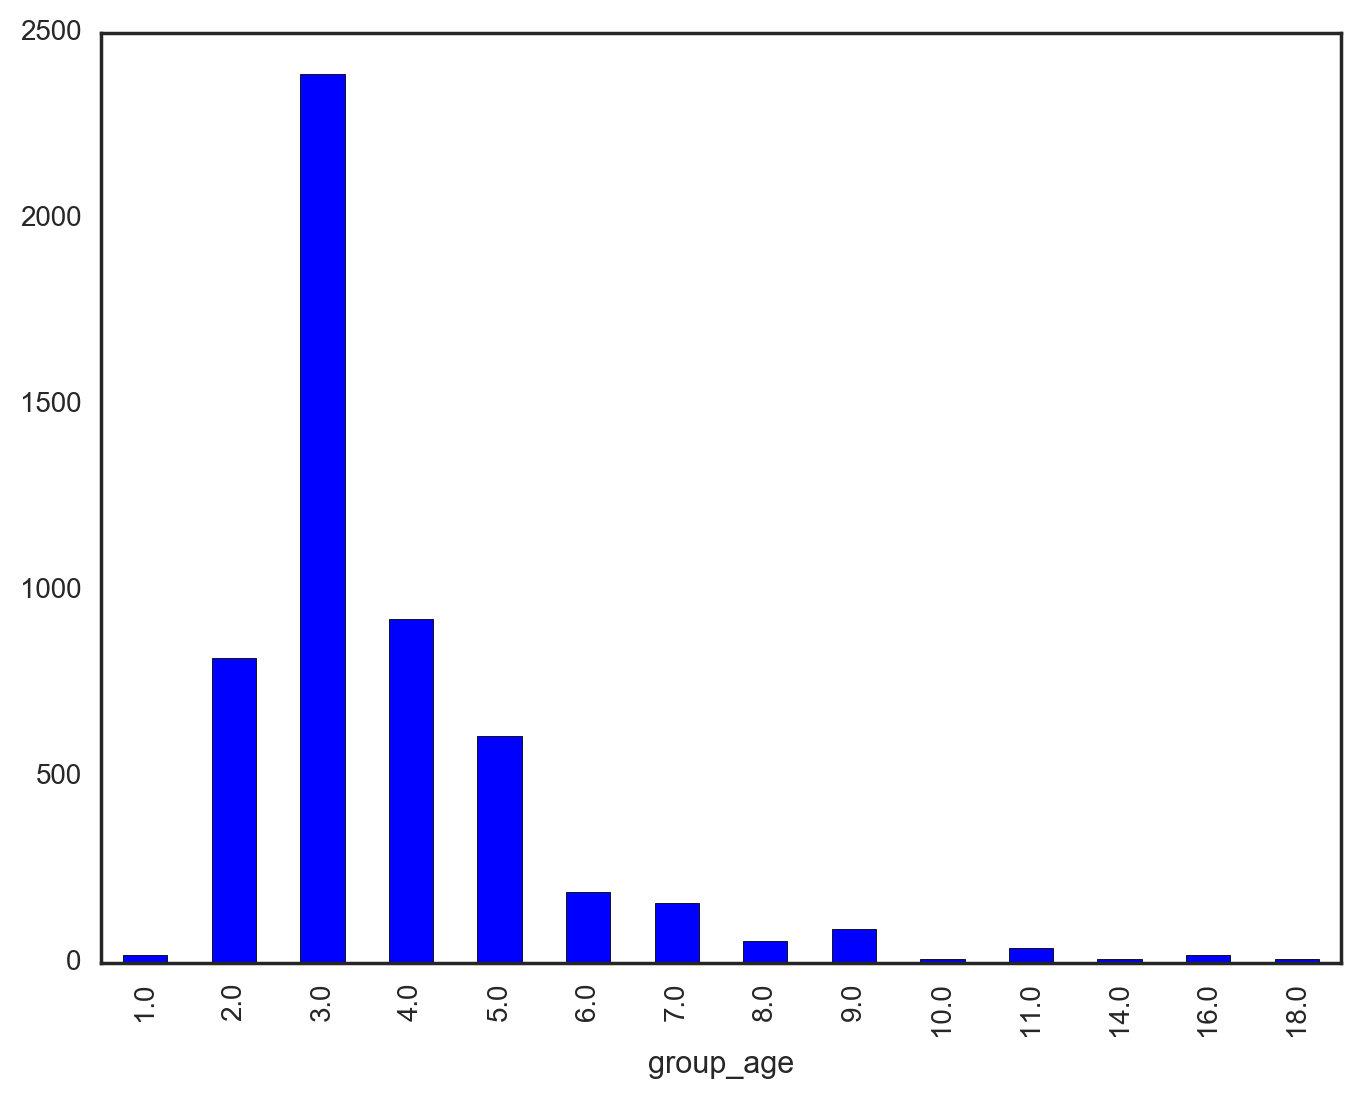

In [233]:
# This might look pretty basic, but it's easier to read in my opinion.
df.groupby(['group_age']).size().plot(kind="bar", color='b')
plt.show()

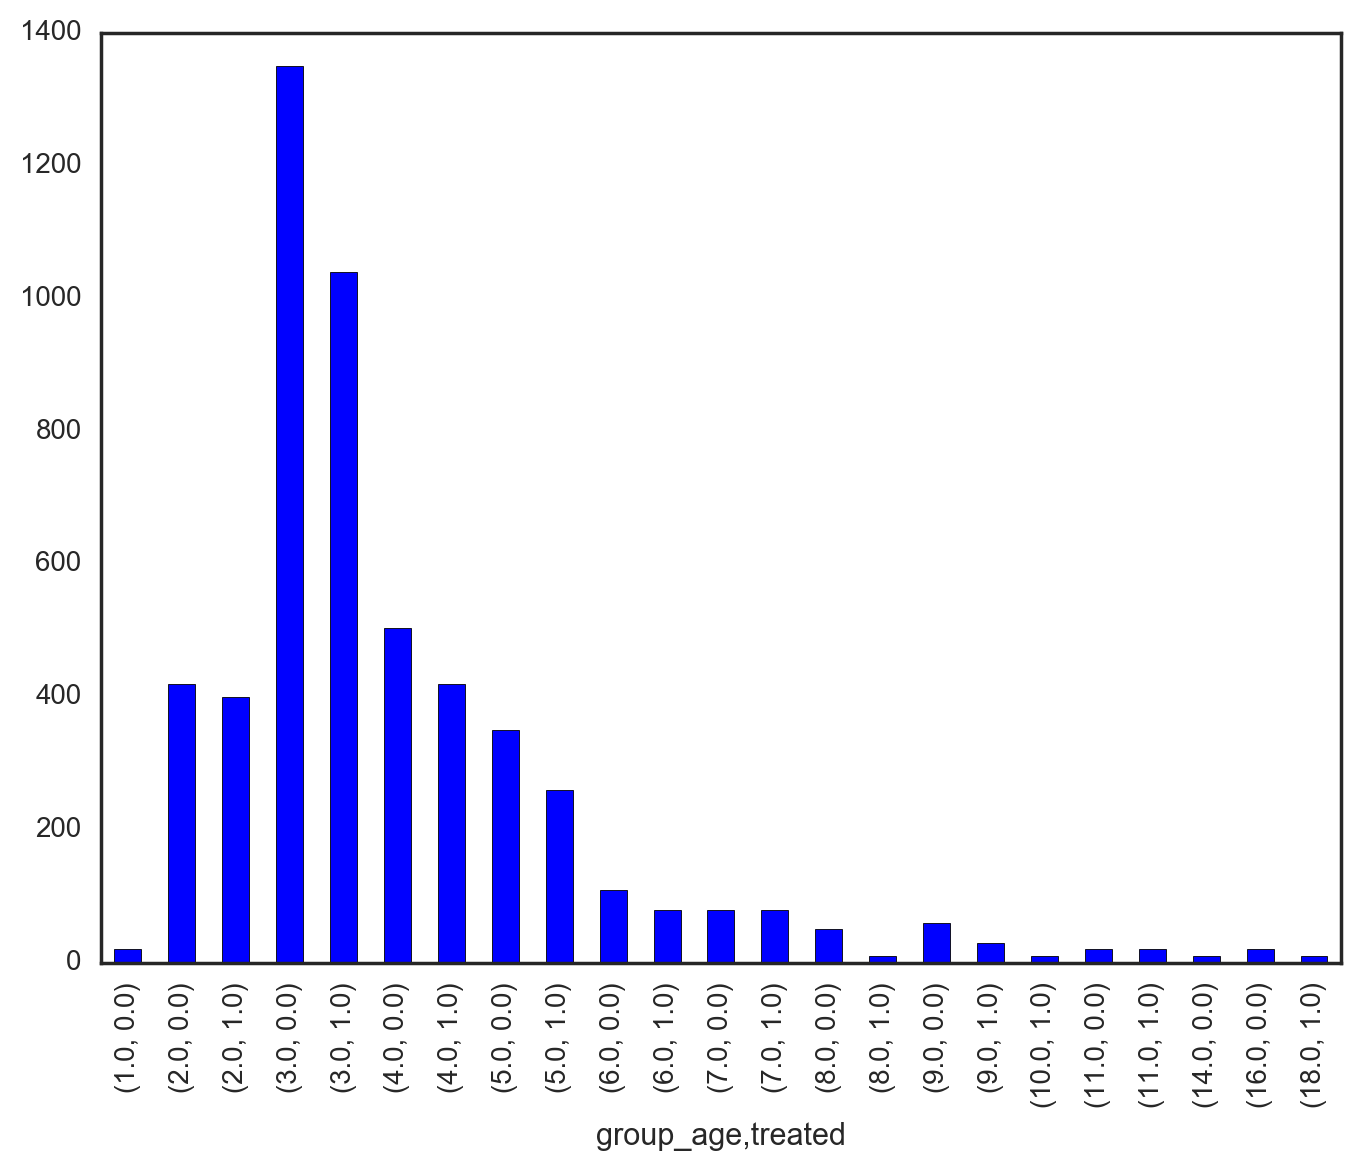

In [326]:
#Is group age somewhat balanced between the treatment and control group? Let's check. 

df.groupby(['group_age','treated']).size().plot(kind="bar", color='b')
plt.show()

In [235]:
#It looks like the treatment group does not have any groups that have been together for
#one year or less, and a lot more groups that have been together for three years than the control
#group. It also looks like there are more groups in the control group. Let's see if this is true. 

df.treated.describe()

count    5354.000000
mean        0.440792
std         0.496538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: treated, dtype: float64

In [236]:
#As suspected, the mean of treated is below .5. Only 44% of the sample was treated. 

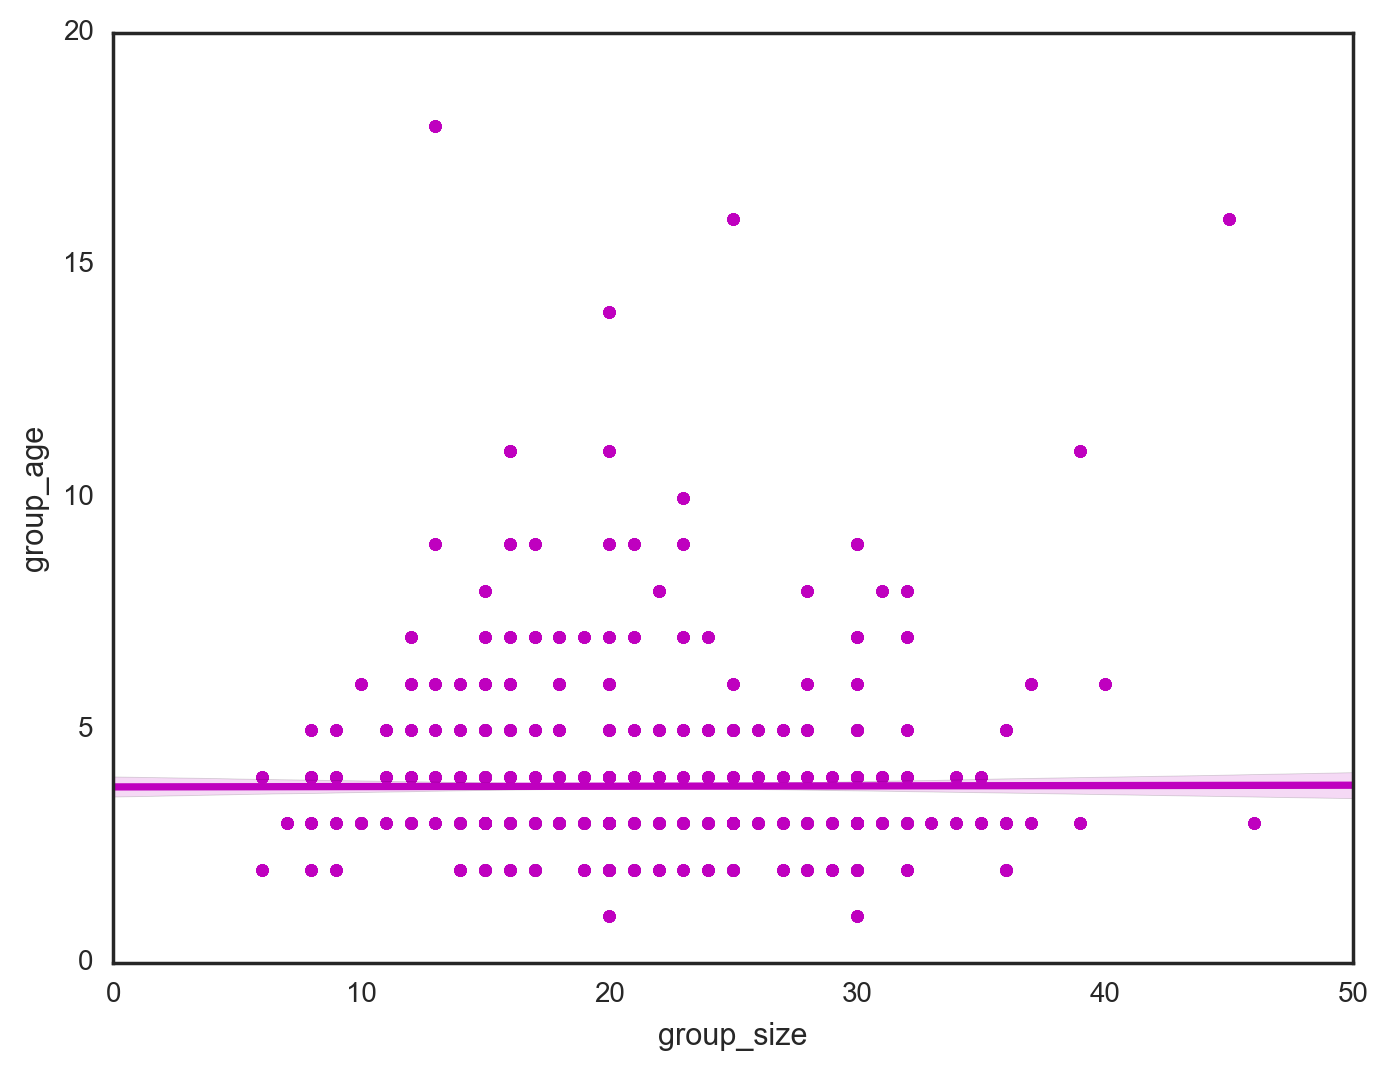

In [237]:
#Is there a relationship between group size and group age, what about between group size and the percentage of
#females in the group?

sns.regplot(df.group_size, df.group_age, color='m')

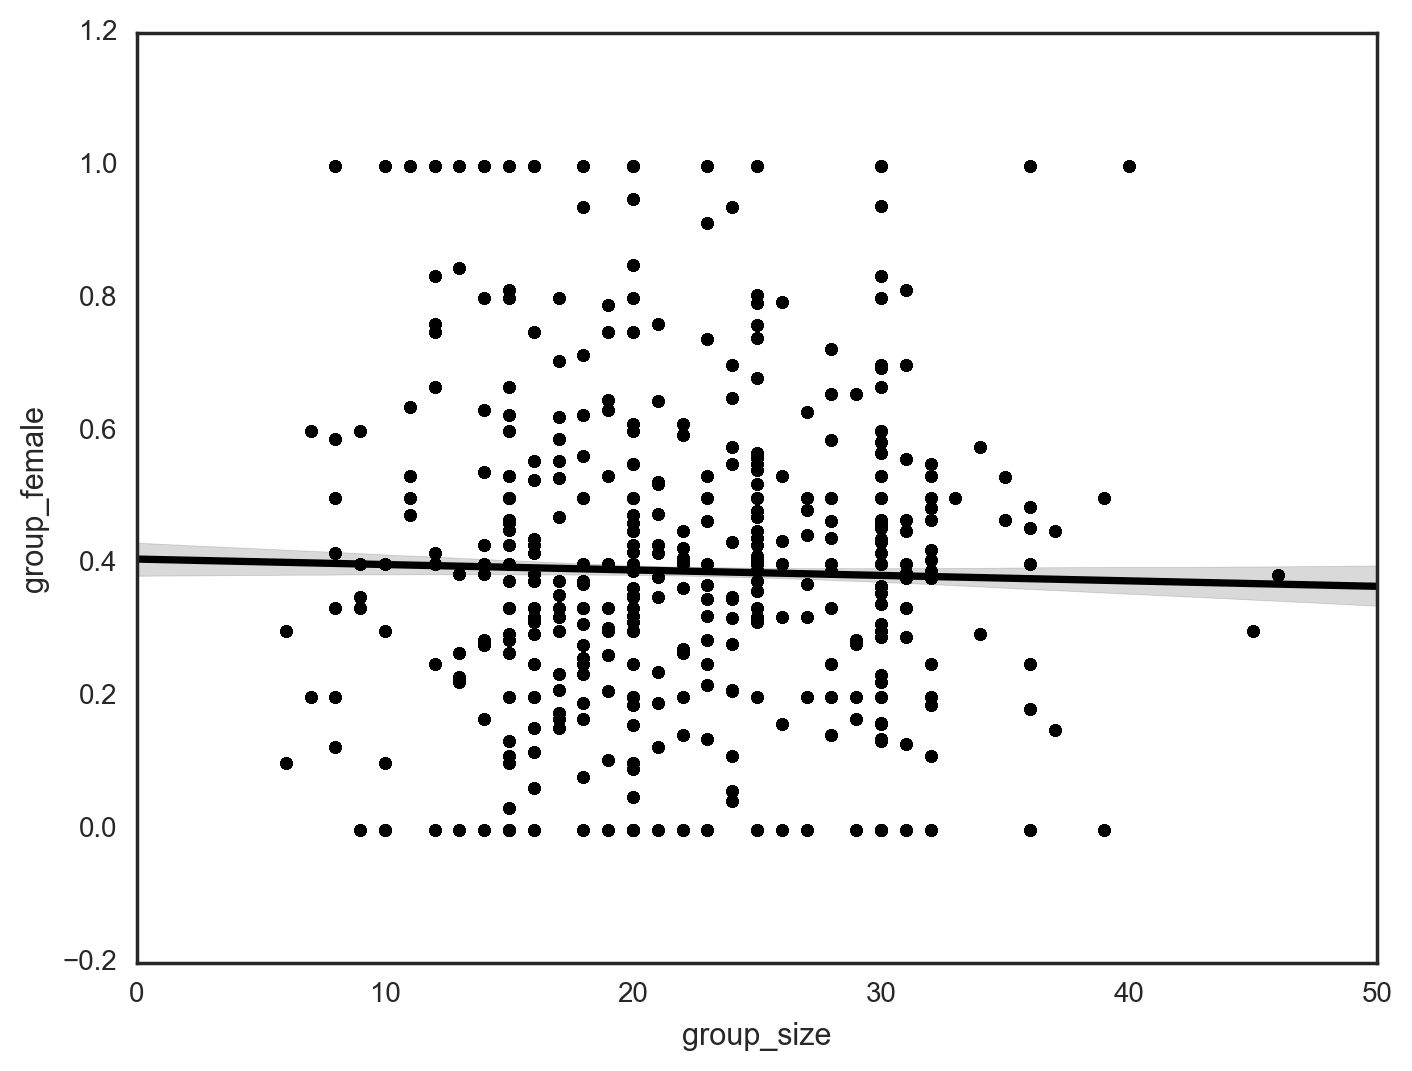

In [238]:
sns.regplot(df.group_size, df.group_female, color='k')

In [239]:
#Group size does not seem to be correlated strongly with the age of the group or the gender make up
#of the group.

# Shall we check out the distribution of a few other, more interesting variables?
# I would like to look at how people in the sample perceive themselves in terms of
# where they are at on a "wealth ladder" (measured 1-9) compared to their peers.
# Also going to look at savings over the last 6 months and profits over last 4 weeks.
# First thing I need to do is replace missing values.
# For each of these it makes sense to replace missing values with the mean since they are continuous
# variables and the sample is relatively large.


In [240]:
df.wealthladder_e = df.wealthladder_e.fillna(np.mean(df.wealthladder_e))

In [241]:
df.profits4w_p99 = df.profits4w_p99.fillna(np.mean(df.profits4w_p99))

In [242]:
df.savings_6mo_p99 = df.savings_6mo_p99.fillna(np.mean(df.savings_6mo_p99))

In [243]:
# These variable names are kind of unweildy, so I'm going to make
# them easier to work with

In [244]:
df.rename(columns={
        'wealthladder_e':'wealthladder',
        'savings_6mo_p99':'savings_6mo',
        'profits4w_p99':'profits4w'
    }, inplace=True)

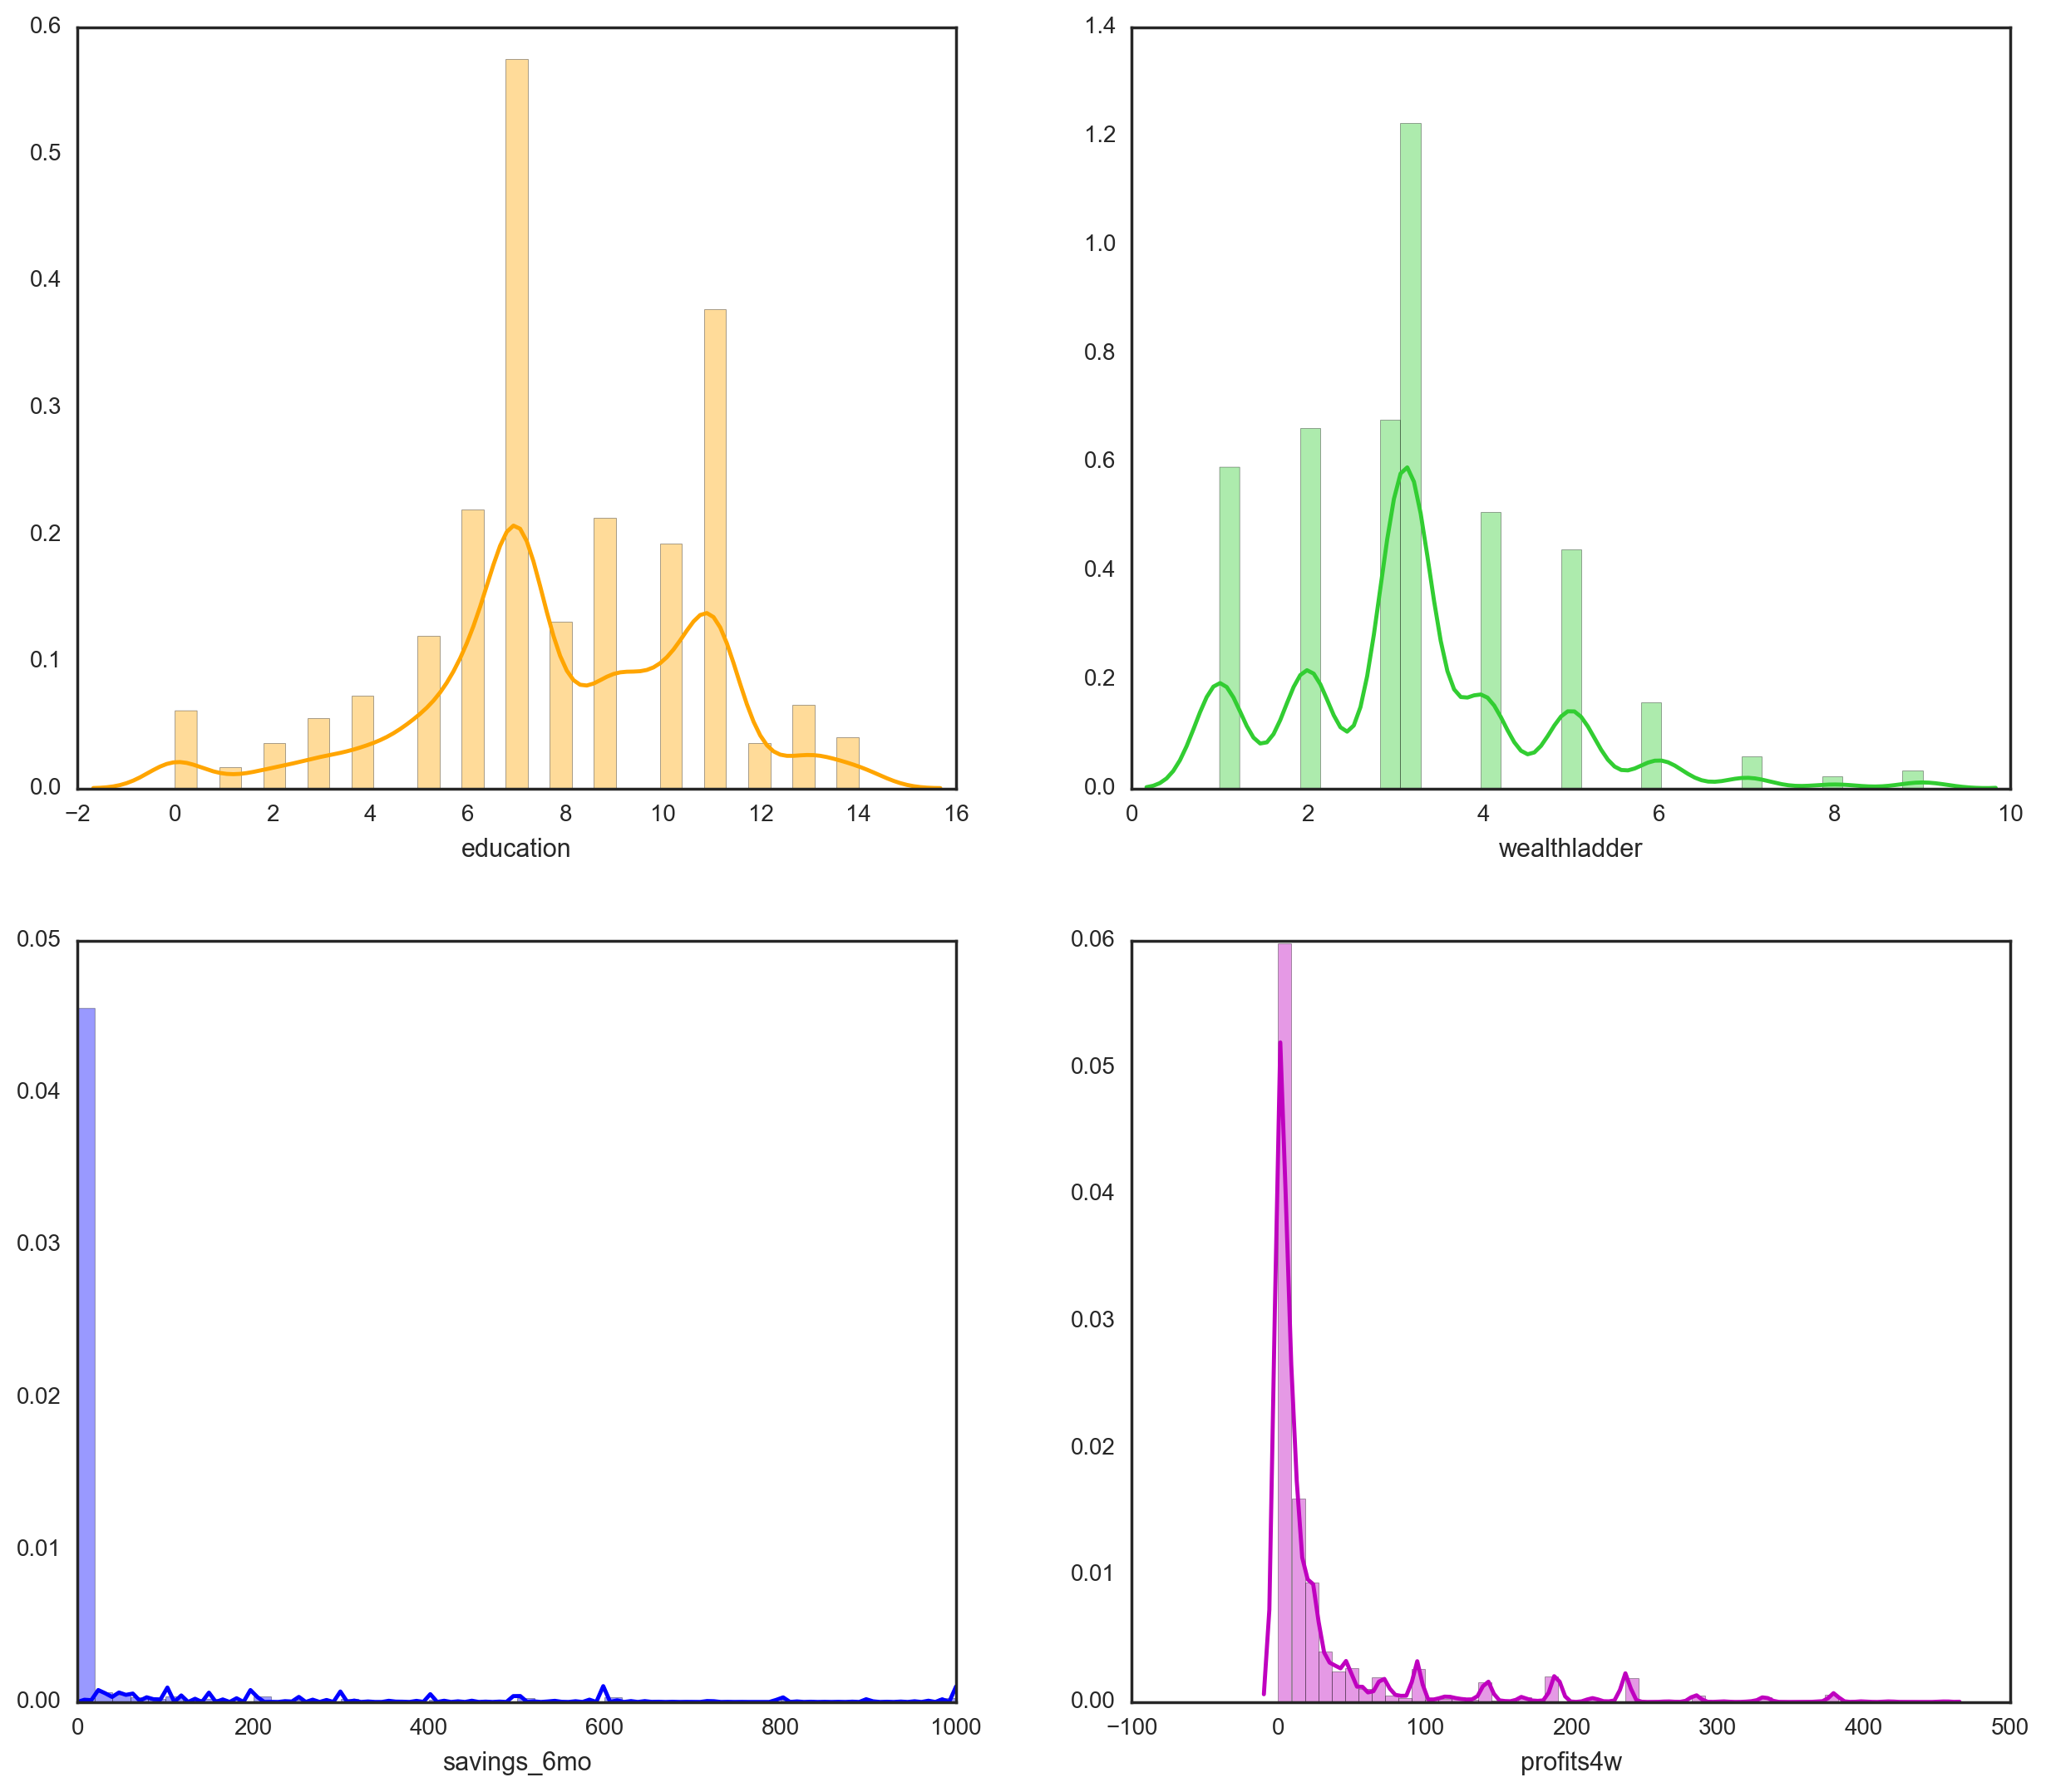

In [245]:
fig, axarr = plt.subplots(2, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(df.education ,ax=axarr[0,0], color='orange')

axarr[0,1] = sns.distplot(df.wealthladder ,ax=axarr[0,1], color='limegreen')       
                          
axarr[1,0] = sns.distplot(df.savings_6mo, ax=axarr[1,0], color='blue')

axarr[1,1] = sns.distplot(df.profits4w, ax=axarr[1,1], color='m')


In [246]:
# Looks like savings and profits are strongly skewed to the right. A boxplot might be
# an easier way to identify outliers.

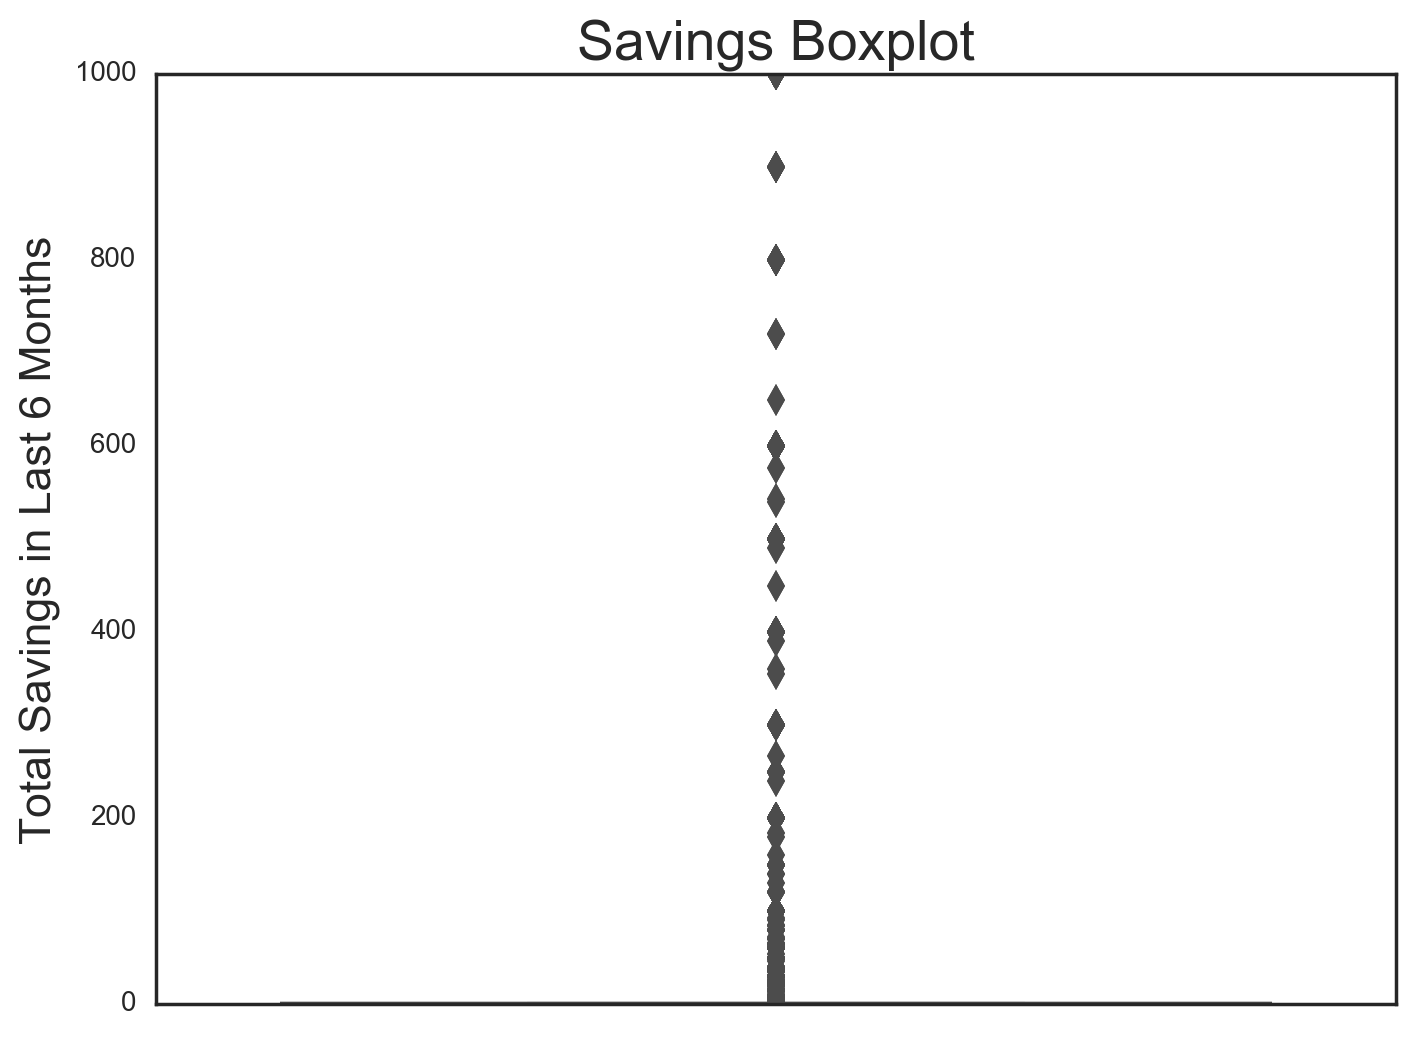

In [247]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.savings_6mo, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Total Savings in Last 6 Months', fontsize=16)
ax.set_title('Savings Boxplot', fontsize=20)

plt.show()

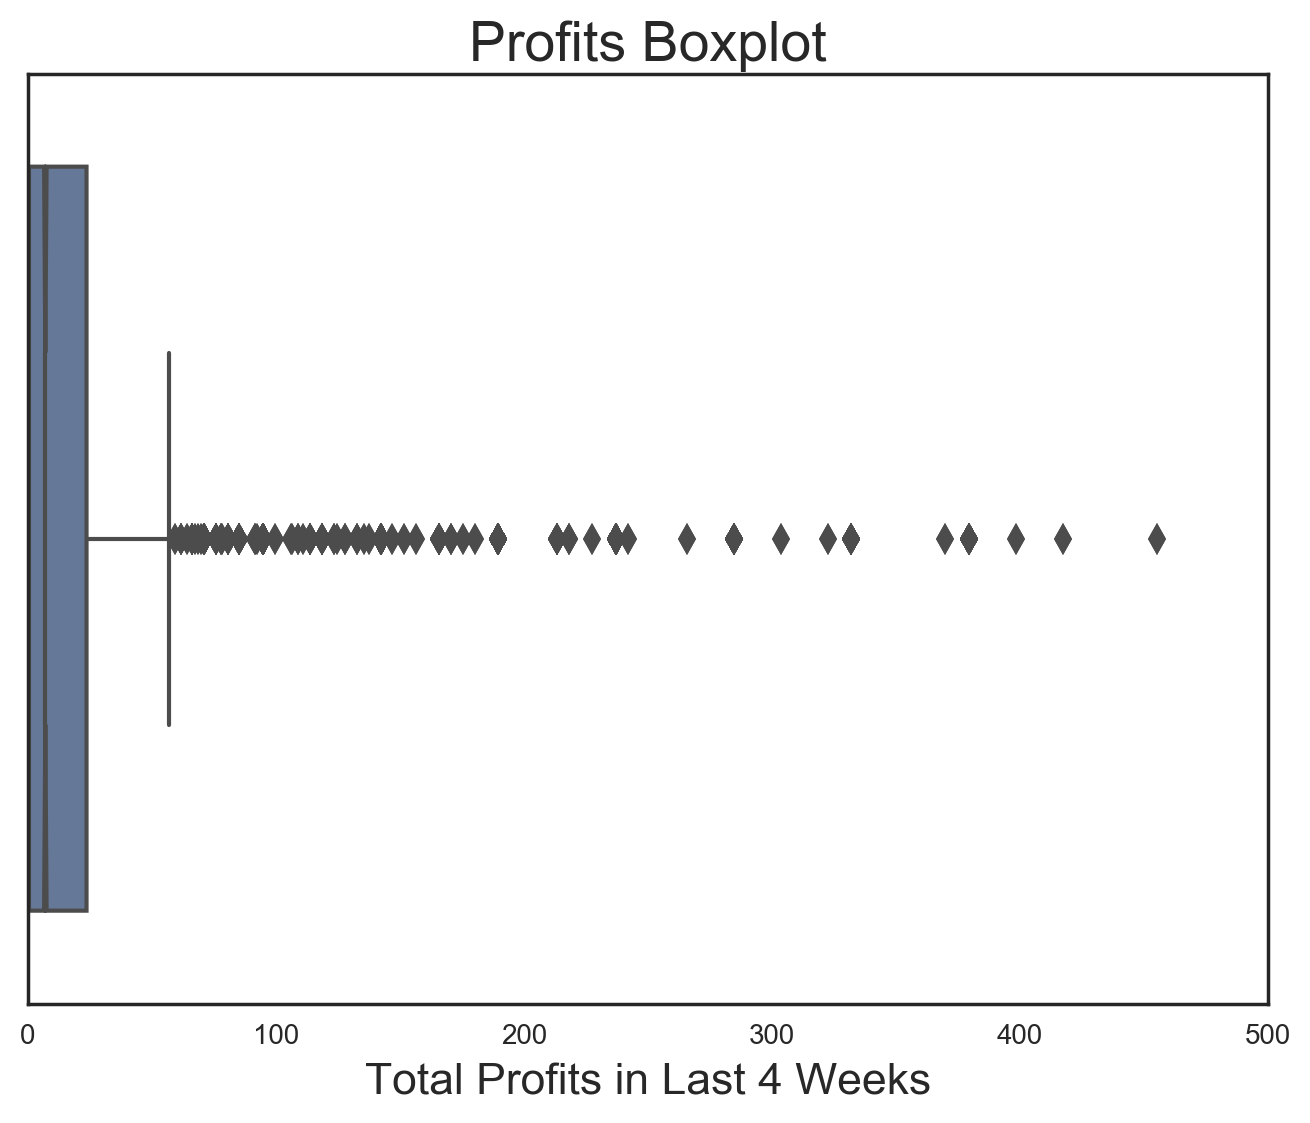

In [248]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df.profits4w, orient='h',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_xlabel('Total Profits in Last 4 Weeks', fontsize=16)
ax.set_title('Profits Boxplot', fontsize=20)

plt.show()

In [249]:
#There are major outliers for both savings and profits. The distribution
#is heavily weighted towards zero for both variables.

Savings mean: 25.4346
Savings std: 118.027


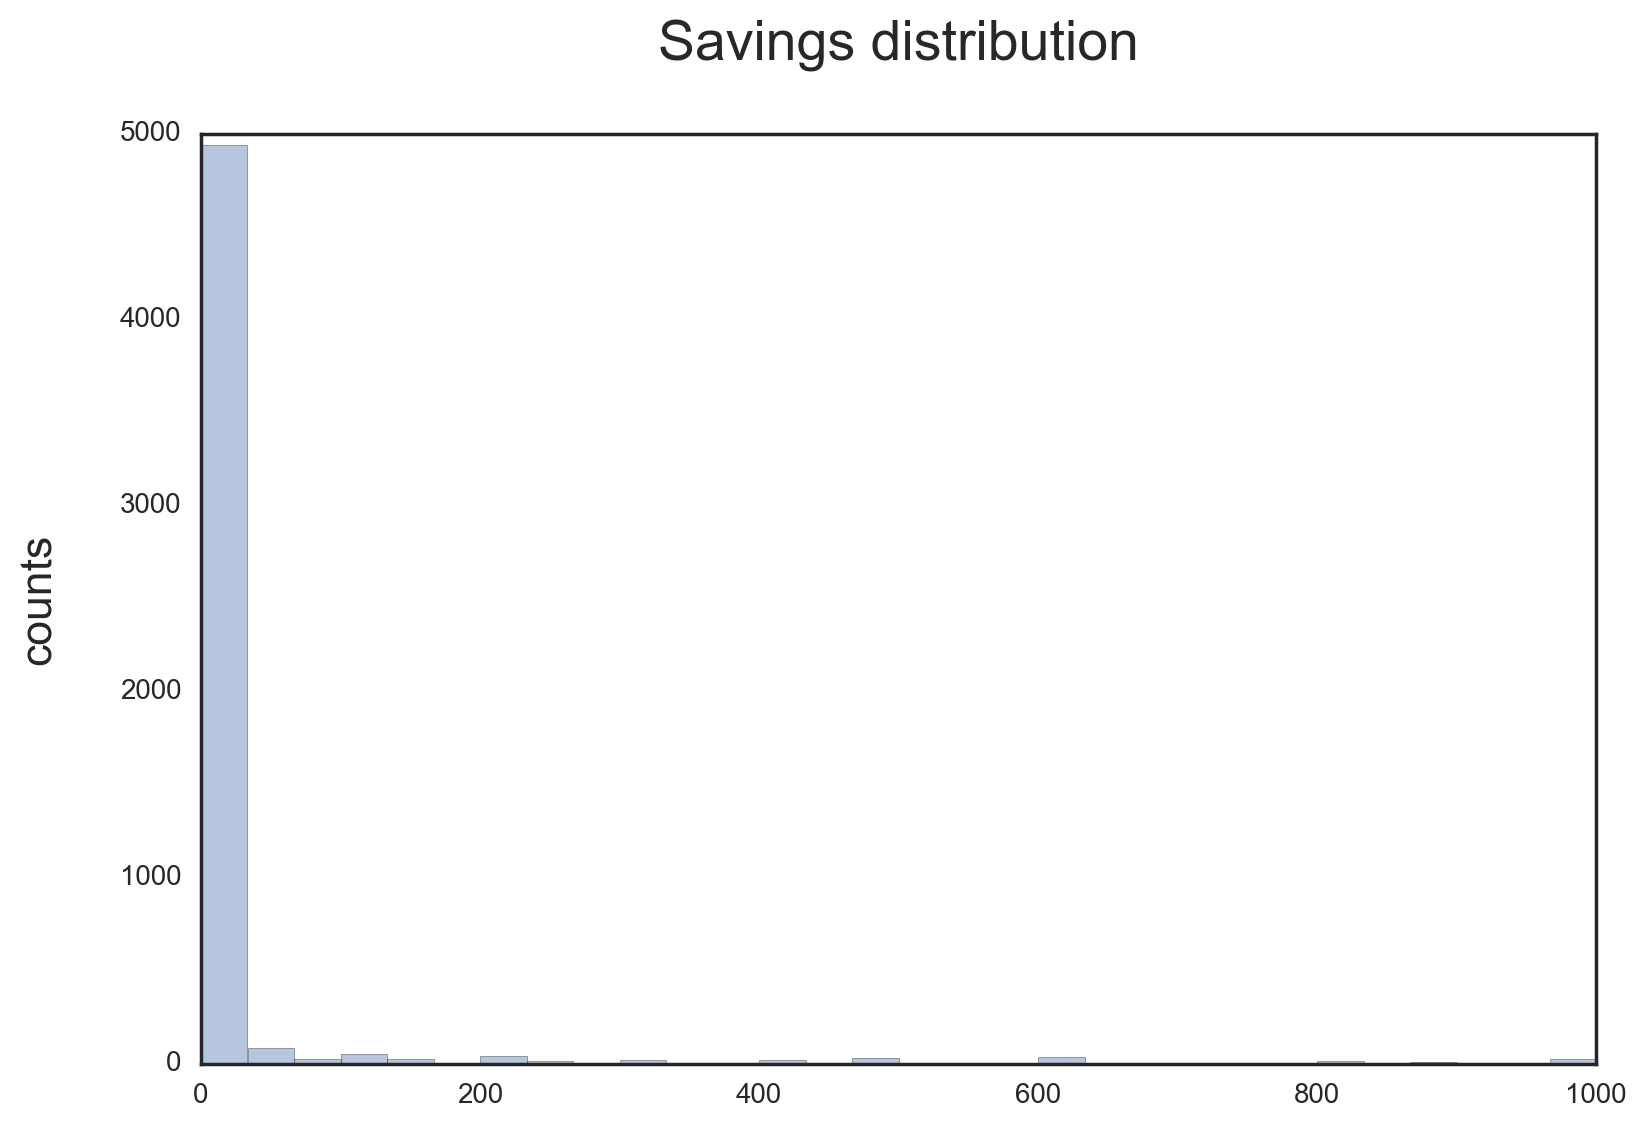

In [250]:
#Now I'm going to remove some of the outliers for the savings variable. First step is to create
#a variable for the mean and standard deviation.

savings_6mo = df.savings_6mo.values

sav_mean = np.mean(savings_6mo)
sav_std = np.std(savings_6mo)

print 'Savings mean:', sav_mean
print 'Savings std:', sav_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(savings_6mo, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Savings distribution\n', fontsize=20)

plt.show()

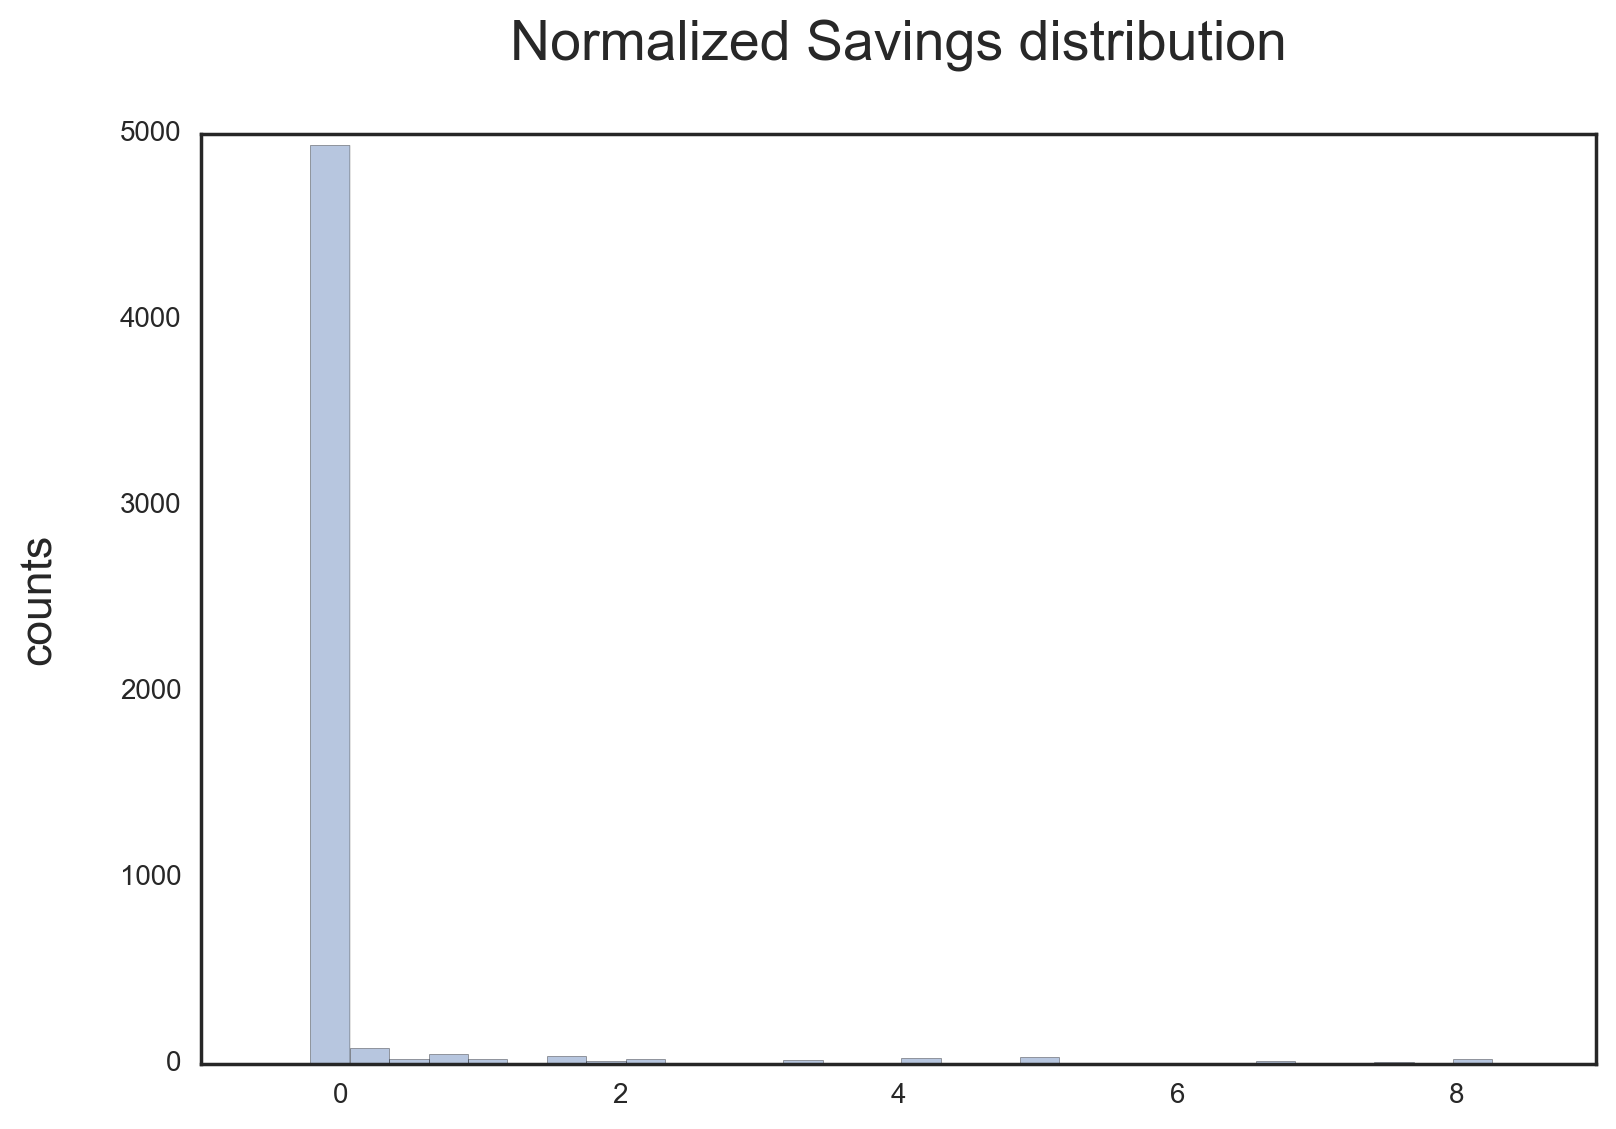

In [251]:
#Now I'll plot the normalized distribution of savings over the previous 6 months.

sav_norm = (savings_6mo - sav_mean) / sav_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(sav_norm, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized Savings distribution\n', fontsize=20)

plt.show()

5354
5228


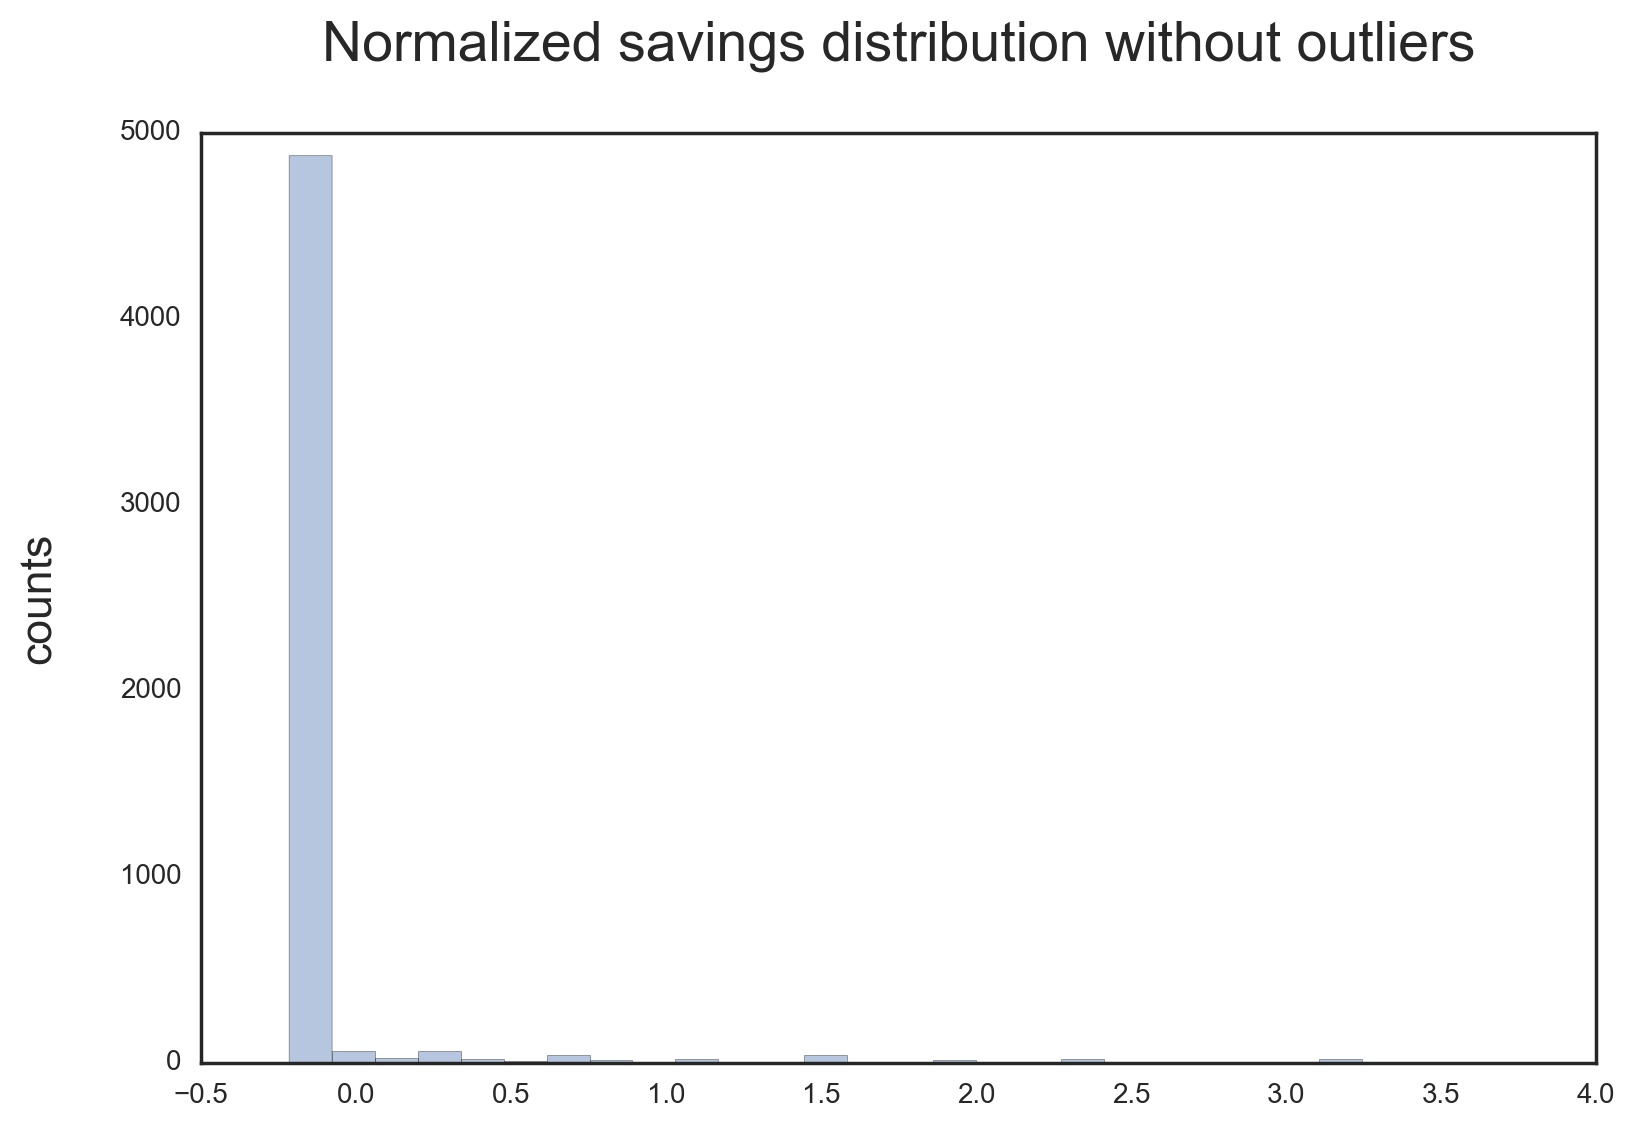

In [252]:
#Time to get rid of some outliers (any values more than 4 standard deviations above the mean).

outlier_mask = (np.abs(sav_norm) < 4)
print len(sav_norm)
sav_norm_no_outliers = sav_norm[outlier_mask]
print len(sav_norm_no_outliers)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(sav_norm_no_outliers, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized savings distribution without outliers\n', fontsize=20)

plt.show()

In [253]:
# It's still EXTREMELY skewed, even though I removed 126 outliers.

In [254]:
# There are several other variables of interest that I want to explore further. 
# I'm going to explore some of those to see how they are related to each other.

In [277]:
#Creating a subset of the larger dataframe so that I can more easily focus on some variables
#that I find particularly interesting

df1=df[["treated","age","education","training_hours_e","grit_e","profits4w",
       "savings_6mo","wealthladder","conscientious_e","cash4w_p99","tot_outloansize_p99","distress__n_e","urban_e","hhcaring_resc_e"]]

In [278]:
#Here is a correlation matrix with what I thought might be interesting variables.
df1.corr()

,treated,age,education,training_hours_e,grit_e,profits4w,savings_6mo,wealthladder,conscientious_e,cash4w_p99,tot_outloansize_p99,distress__n_e,urban_e,hhcaring_resc_e
treated,1.000000,0.032724,-0.000610,0.468562,-0.058901,0.048032,0.076354,0.109012,-0.000523,0.048032,-0.010134,0.025326,-0.053804,-0.006471
age,0.032724,1.000000,0.039496,-0.007589,-0.095457,0.099217,0.107611,0.080091,-0.028261,0.099217,0.094025,0.019617,-0.021787,0.029013
education,-0.000610,0.039496,1.000000,0.051877,0.083713,0.048579,0.111293,0.121190,0.078584,0.048579,0.104067,-0.066331,0.130960,0.032234
training_hours_e,0.468562,-0.007589,0.051877,1.000000,NaN,0.010945,0.029278,0.089314,NaN,0.010945,-0.007367,-0.025089,-0.033671,0.050722
grit_e,-0.058901,-0.095457,0.083713,NaN,1.000000,-0.024884,-0.085186,-0.078328,0.366900,-0.024884,-0.037389,-0.087624,-0.040087,0.161958
profits4w,0.048032,0.099217,0.048579,0.010945,-0.024884,1.000000,0.169572,0.021322,0.004163,1.000000,0.051732,-0.020331,0.057267,-0.011810
savings_6mo,0.076354,0.107611,0.111293,0.029278,-0.085186,0.169572,1.000000,0.068320,-0.007938,0.169572,0.188168,0.038272,0.081460,-0.026165
wealthladder,0.109012,0.080091,0.121190,0.089314,-0.078328,0.021322,0.068320,1.000000,-0.065922,0.021322,0.042305,0.002773,0.017276,0.115287
conscientious_e,-0.000523,-0.028261,0.078584,NaN,0.366900,0.004163,-0.007938,-0.065922,1.000000,0.004163,0.008379,-0.157711,-0.002999,0.035931
cash4w_p99,0.048032,0.099217,0.048579,0.010945,-0.024884,1.000000,0.169572,0.021322,0.004163,1.000000,0.051732,-0.020331,0.057267,-0.011810


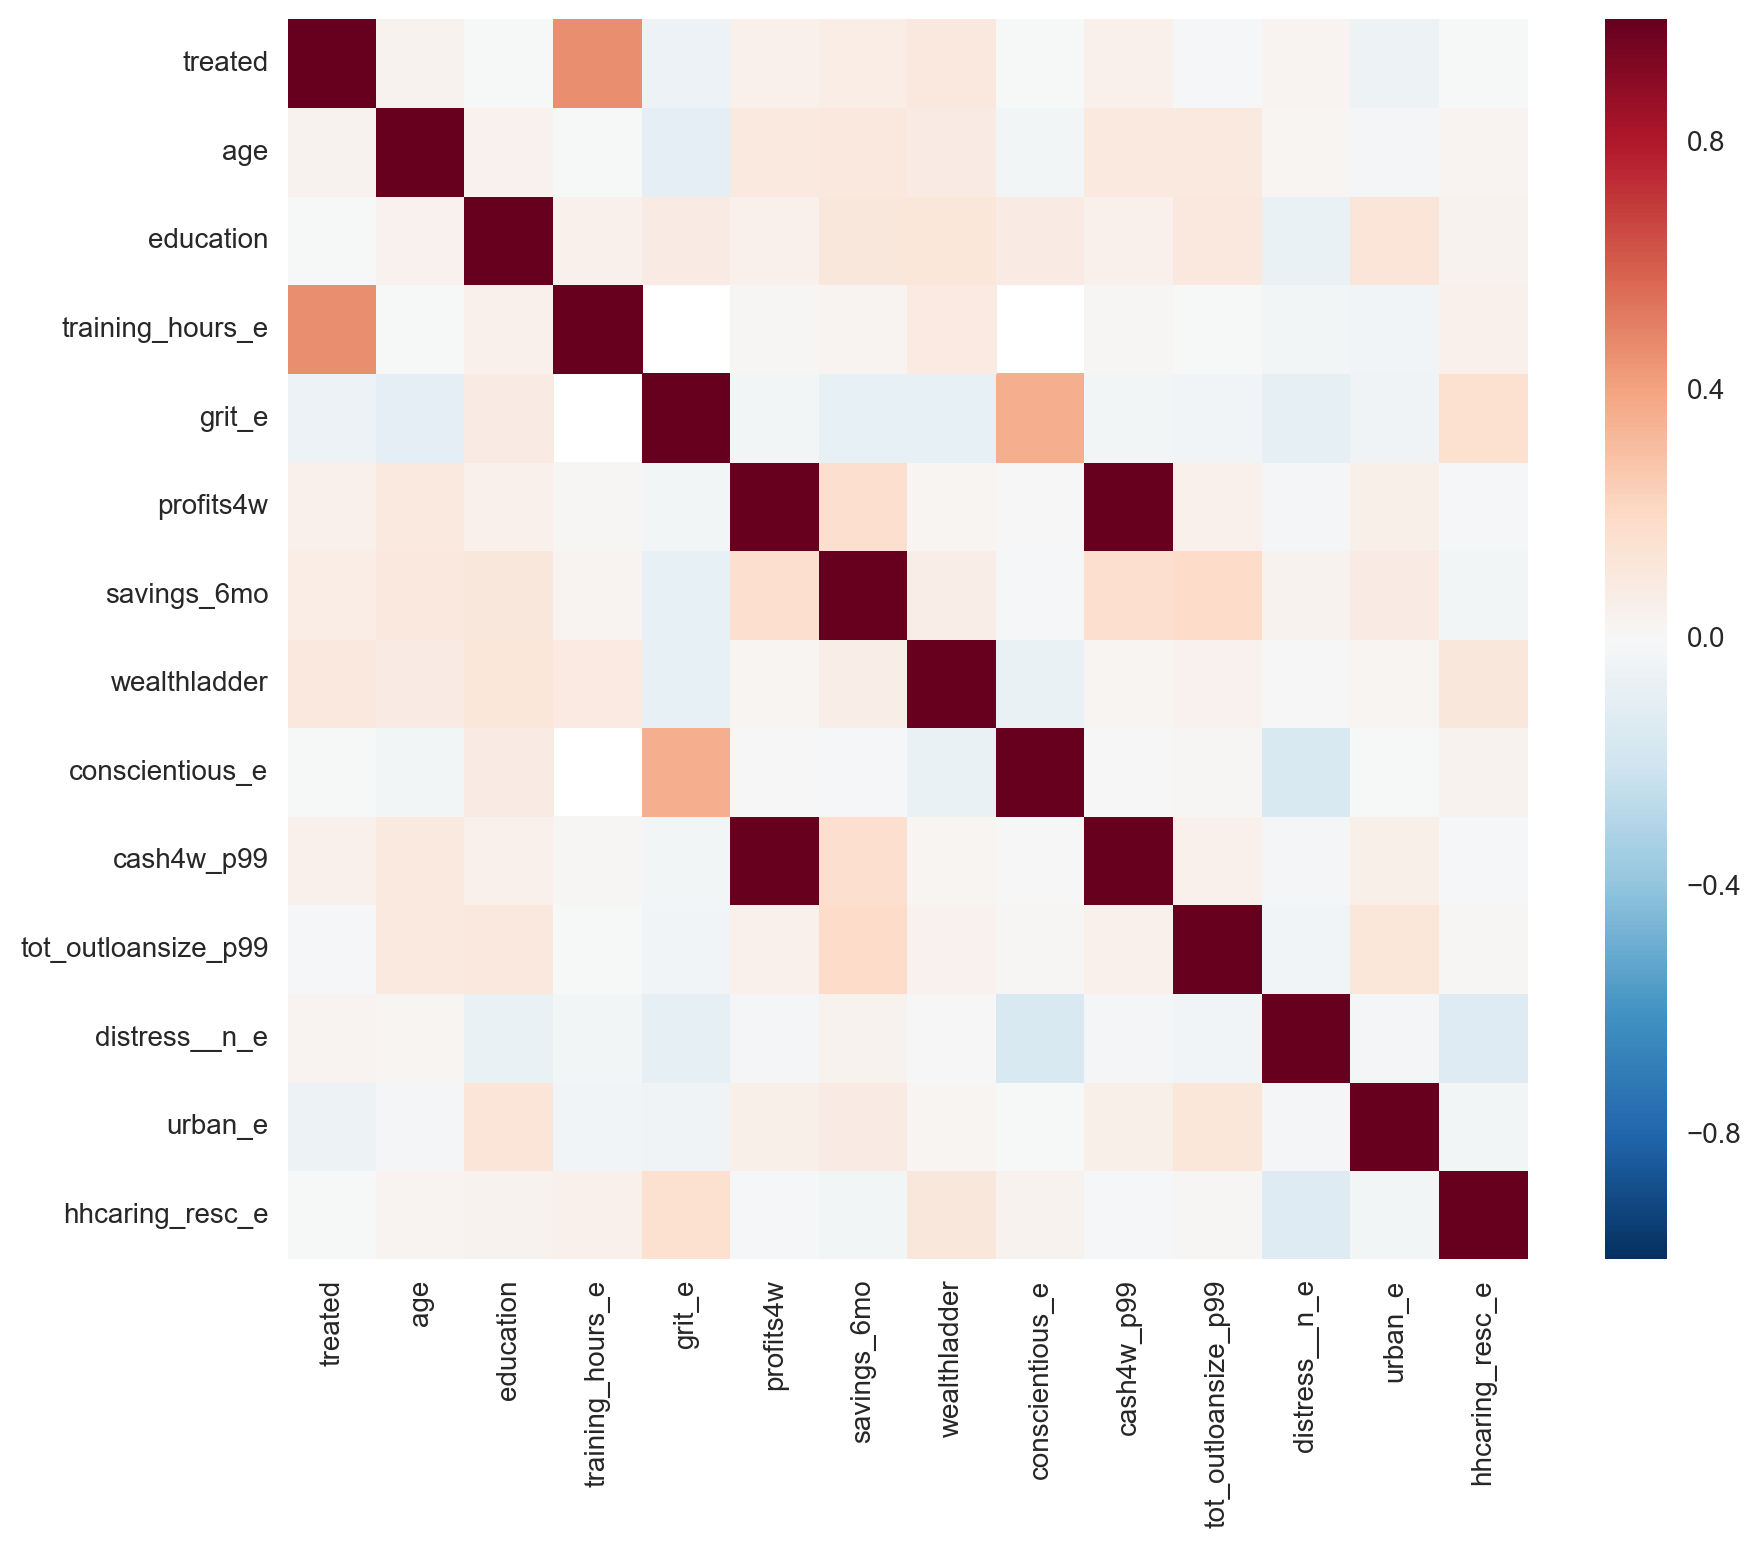

In [279]:
# Here is a heat map of the same variables.

fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df1.corr(), ax=ax)
plt.show()

In [309]:
#There are many missing values for the variables in the correlation matrix above. 
#I am going to replace them with 
#the mean, and then generate a new correlation matrix and a new heat map.

#Defining a new function here to fill missing values with the mean. Mario helped me with this code to streamline
#the process of replacing missing values and to help identify how many values I replaced.

def missing_values(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with mean = ", data.isnull().sum()
        data.fillna(np.mean(data), inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values = 0"

In [310]:
missing_values(df1.hhcaring_resc_e)

Number of missing values = 0


In [311]:
missing_values(df1.distress__n_e)

Number of missing values = 0


In [285]:
missing_values(df1.urban_e)

Number of missing values replaced with mean =  1491


In [283]:
missing_values(df1.tot_outloansize_p99)

Number of missing values replaced with mean =  224


In [281]:
missing_values(df1.cash4w_p99)

Number of missing values = 0


In [280]:
missing_values(df1.conscientious_e)

Number of missing values replaced with mean =  3492


In [276]:
missing_values(df1.training_hours_e)

Number of missing values replaced with mean =  3355


In [275]:
missing_values(df1.grit_e)

Number of missing values replaced with mean =  3492


In [288]:
df1_replaced=df[["treated","age","education","training_hours_e","grit_e","profits4w",
       "savings_6mo","wealthladder","conscientious_e","cash4w_p99","tot_outloansize_p99",
       "distress__n_e","urban_e","hhcaring_resc_e"]]

In [289]:
#Here is a correlation matrix with the same variables now that their missing values have been replaced.
df1_replaced.corr()

,treated,age,education,training_hours_e,grit_e,profits4w,savings_6mo,wealthladder,conscientious_e,cash4w_p99,tot_outloansize_p99,distress__n_e,urban_e,hhcaring_resc_e
treated,1.000000,0.032724,-0.000610,0.468562,-0.058901,0.048032,0.076354,0.109012,-0.000523,0.048032,-0.010134,0.025326,-0.053804,-0.006471
age,0.032724,1.000000,0.039496,-0.007589,-0.095457,0.099217,0.107611,0.080091,-0.028261,0.099217,0.094025,0.019617,-0.021787,0.029013
education,-0.000610,0.039496,1.000000,0.051877,0.083713,0.048579,0.111293,0.121190,0.078584,0.048579,0.104067,-0.066331,0.130960,0.032234
training_hours_e,0.468562,-0.007589,0.051877,1.000000,NaN,0.010945,0.029278,0.089314,NaN,0.010945,-0.007367,-0.025089,-0.033671,0.050722
grit_e,-0.058901,-0.095457,0.083713,NaN,1.000000,-0.024884,-0.085186,-0.078328,0.366900,-0.024884,-0.037389,-0.087624,-0.040087,0.161958
profits4w,0.048032,0.099217,0.048579,0.010945,-0.024884,1.000000,0.169572,0.021322,0.004163,1.000000,0.051732,-0.020331,0.057267,-0.011810
savings_6mo,0.076354,0.107611,0.111293,0.029278,-0.085186,0.169572,1.000000,0.068320,-0.007938,0.169572,0.188168,0.038272,0.081460,-0.026165
wealthladder,0.109012,0.080091,0.121190,0.089314,-0.078328,0.021322,0.068320,1.000000,-0.065922,0.021322,0.042305,0.002773,0.017276,0.115287
conscientious_e,-0.000523,-0.028261,0.078584,NaN,0.366900,0.004163,-0.007938,-0.065922,1.000000,0.004163,0.008379,-0.157711,-0.002999,0.035931
cash4w_p99,0.048032,0.099217,0.048579,0.010945,-0.024884,1.000000,0.169572,0.021322,0.004163,1.000000,0.051732,-0.020331,0.057267,-0.011810


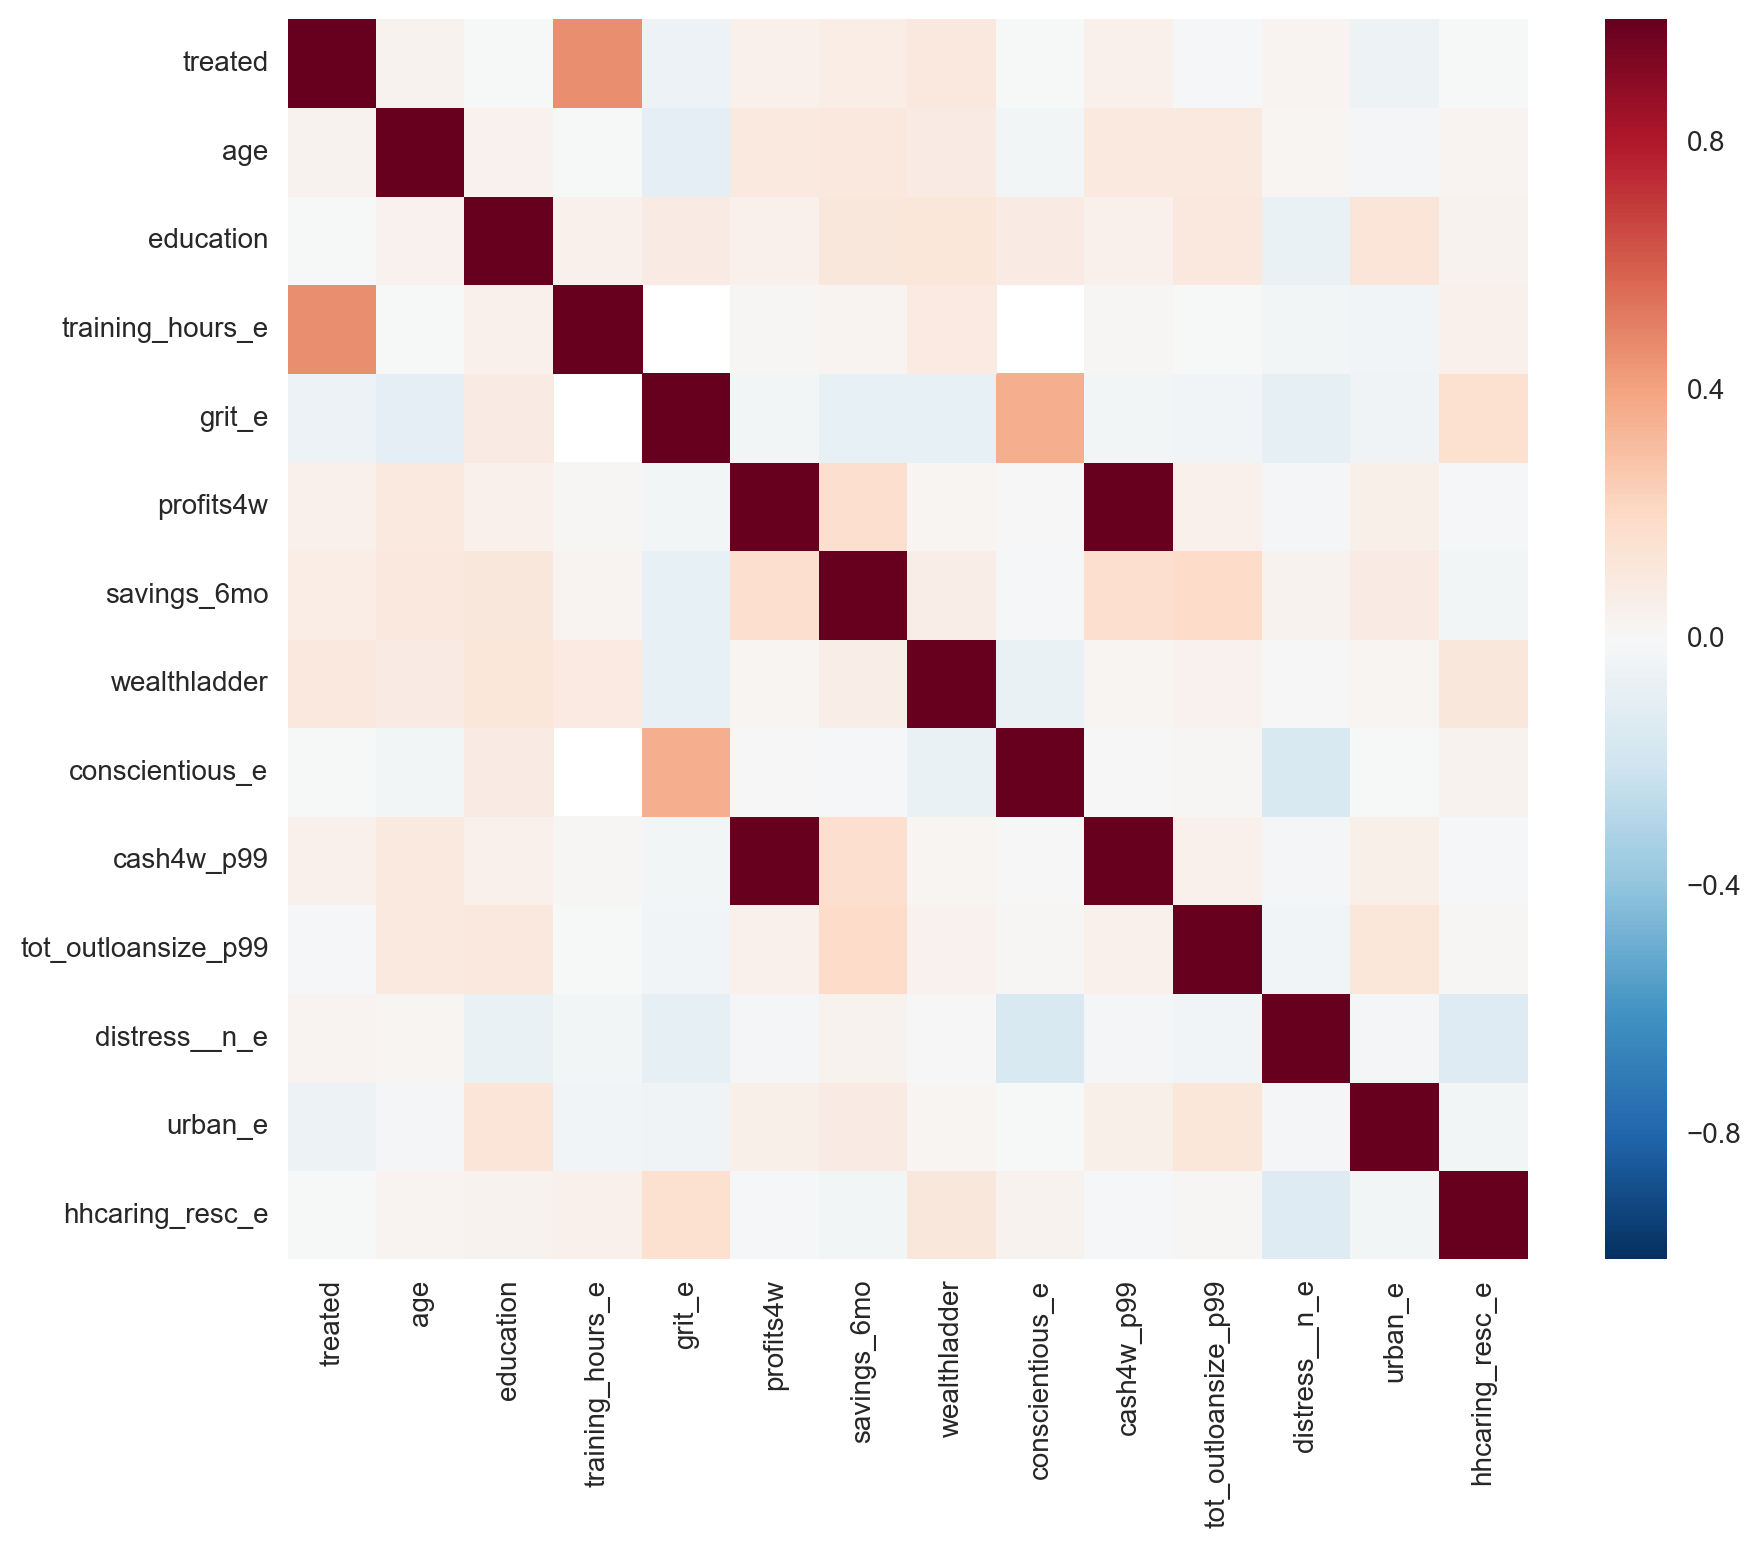

In [290]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df1_replaced.corr(), ax=ax)
plt.show()

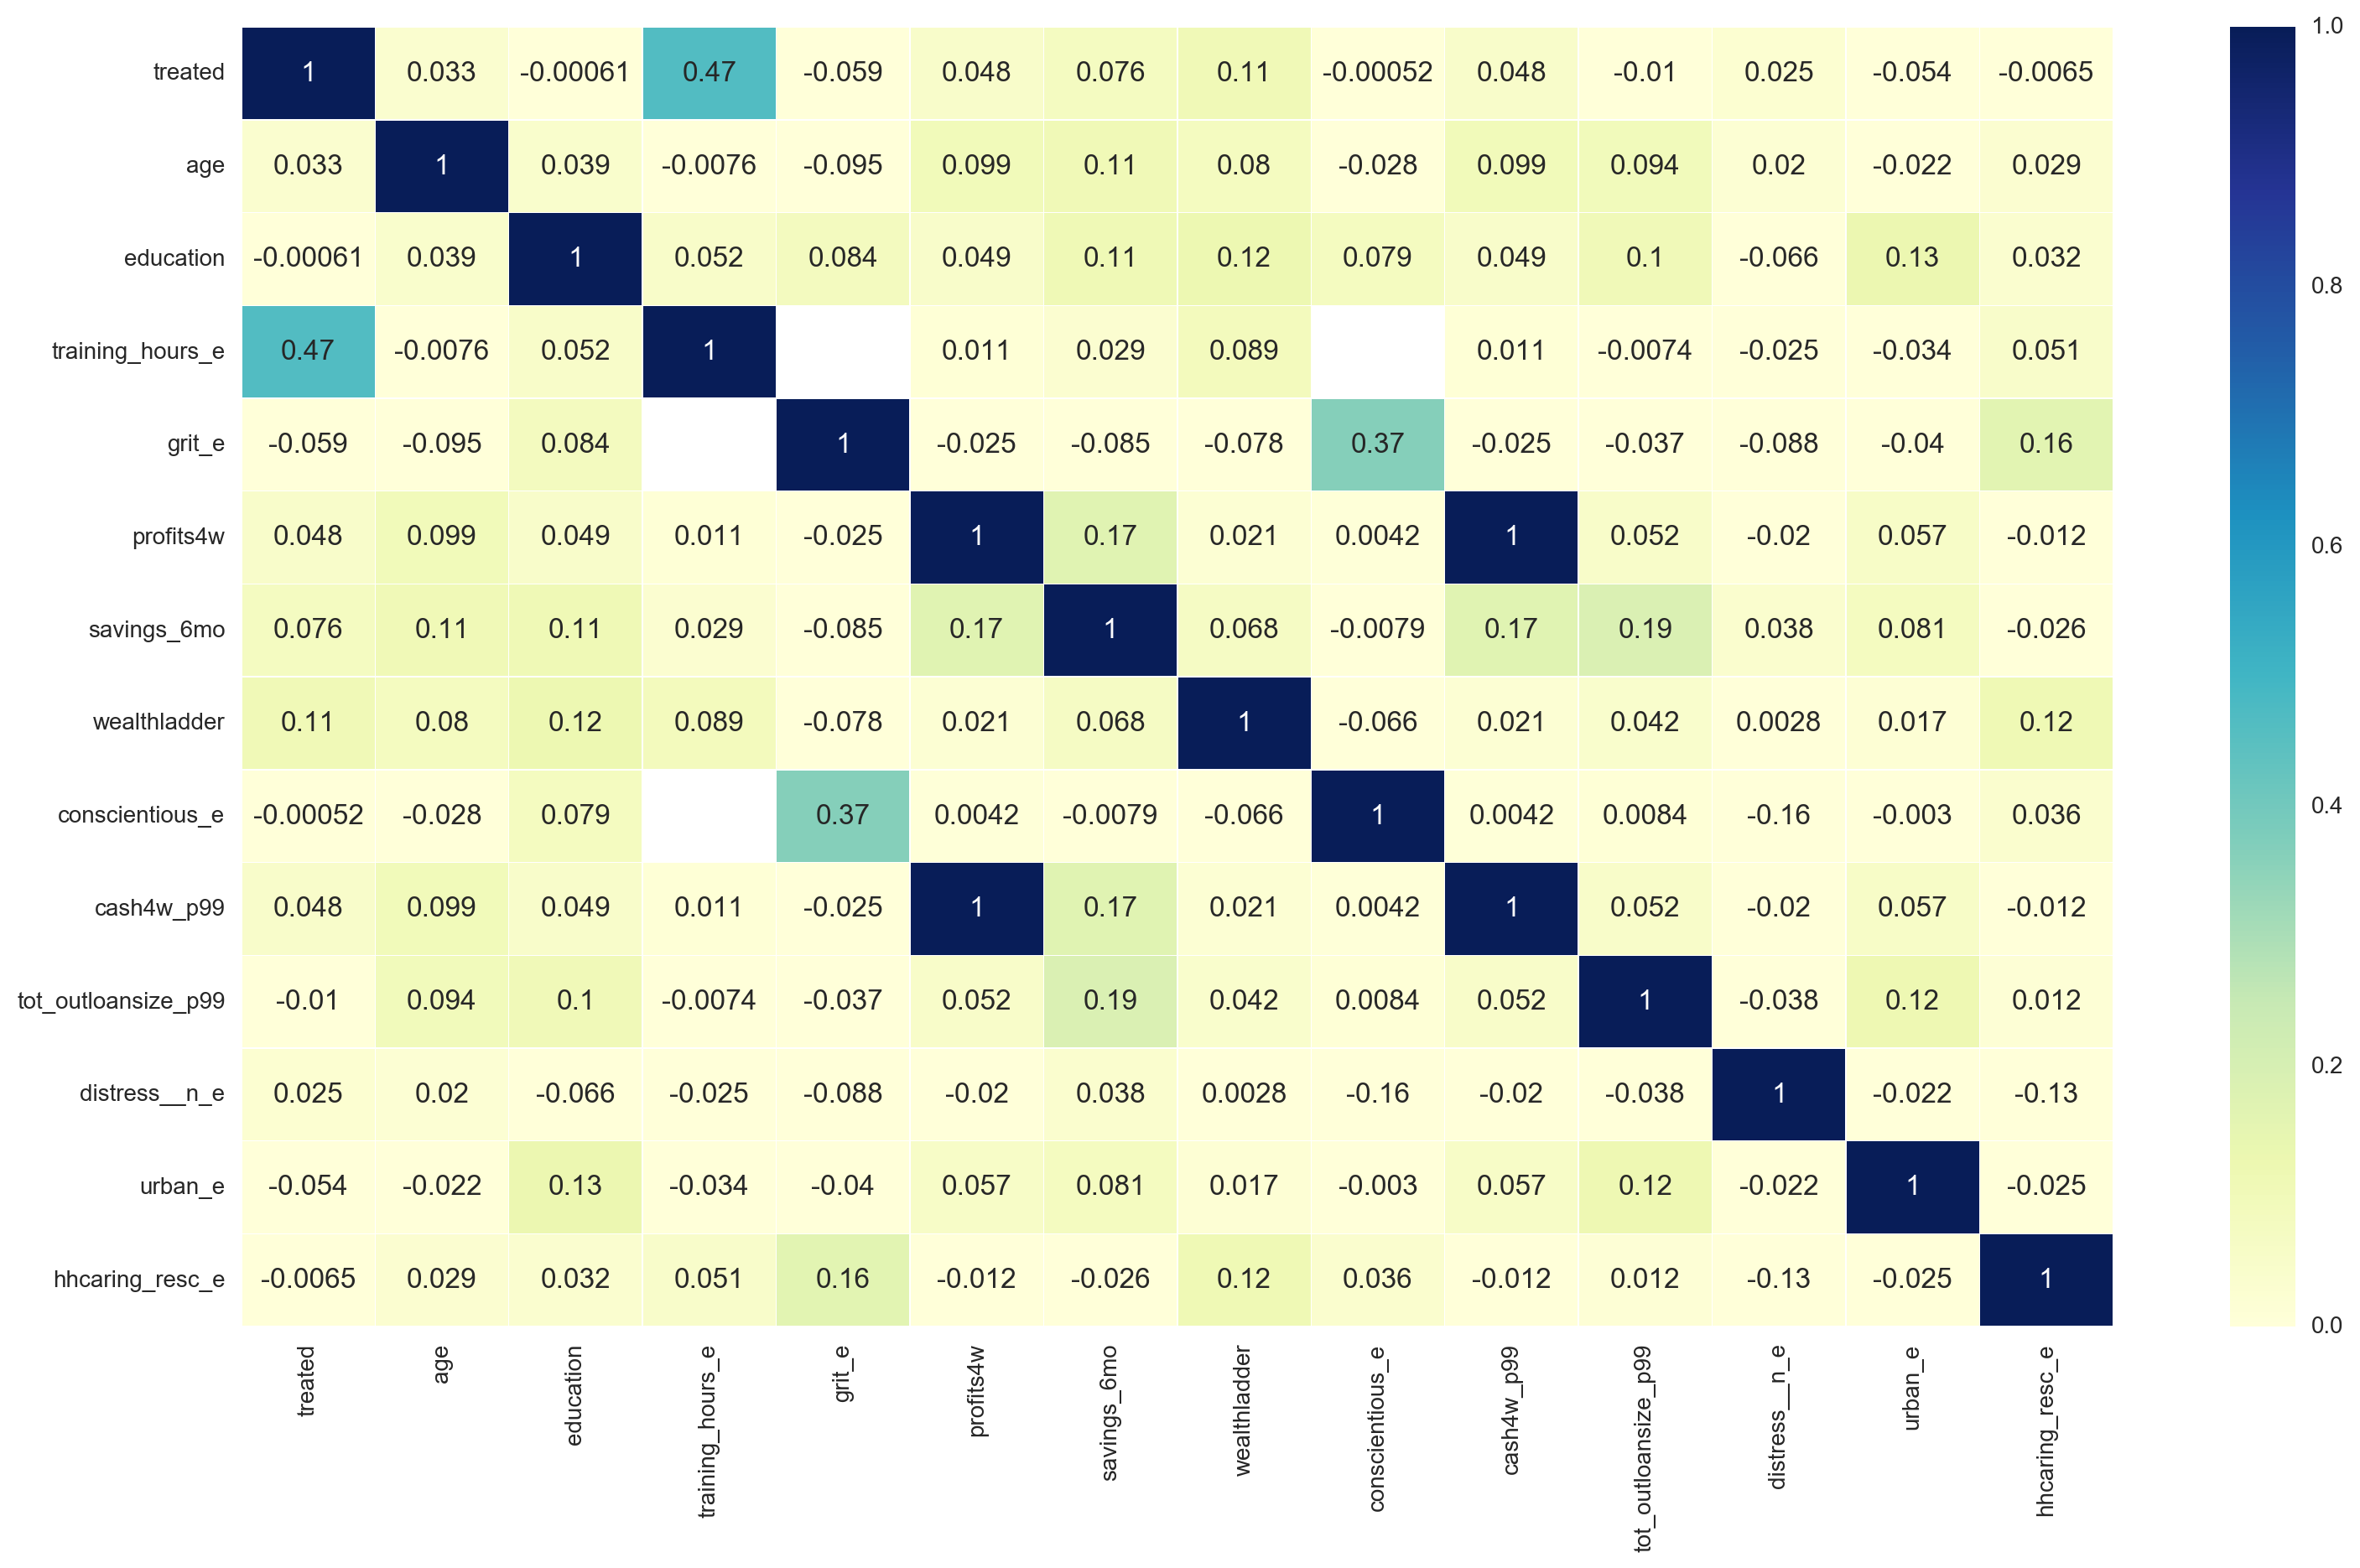

In [319]:
# This graph will give us a bit more detail on the levels of correlations we are observing among
# these variables.

fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df1_replaced.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

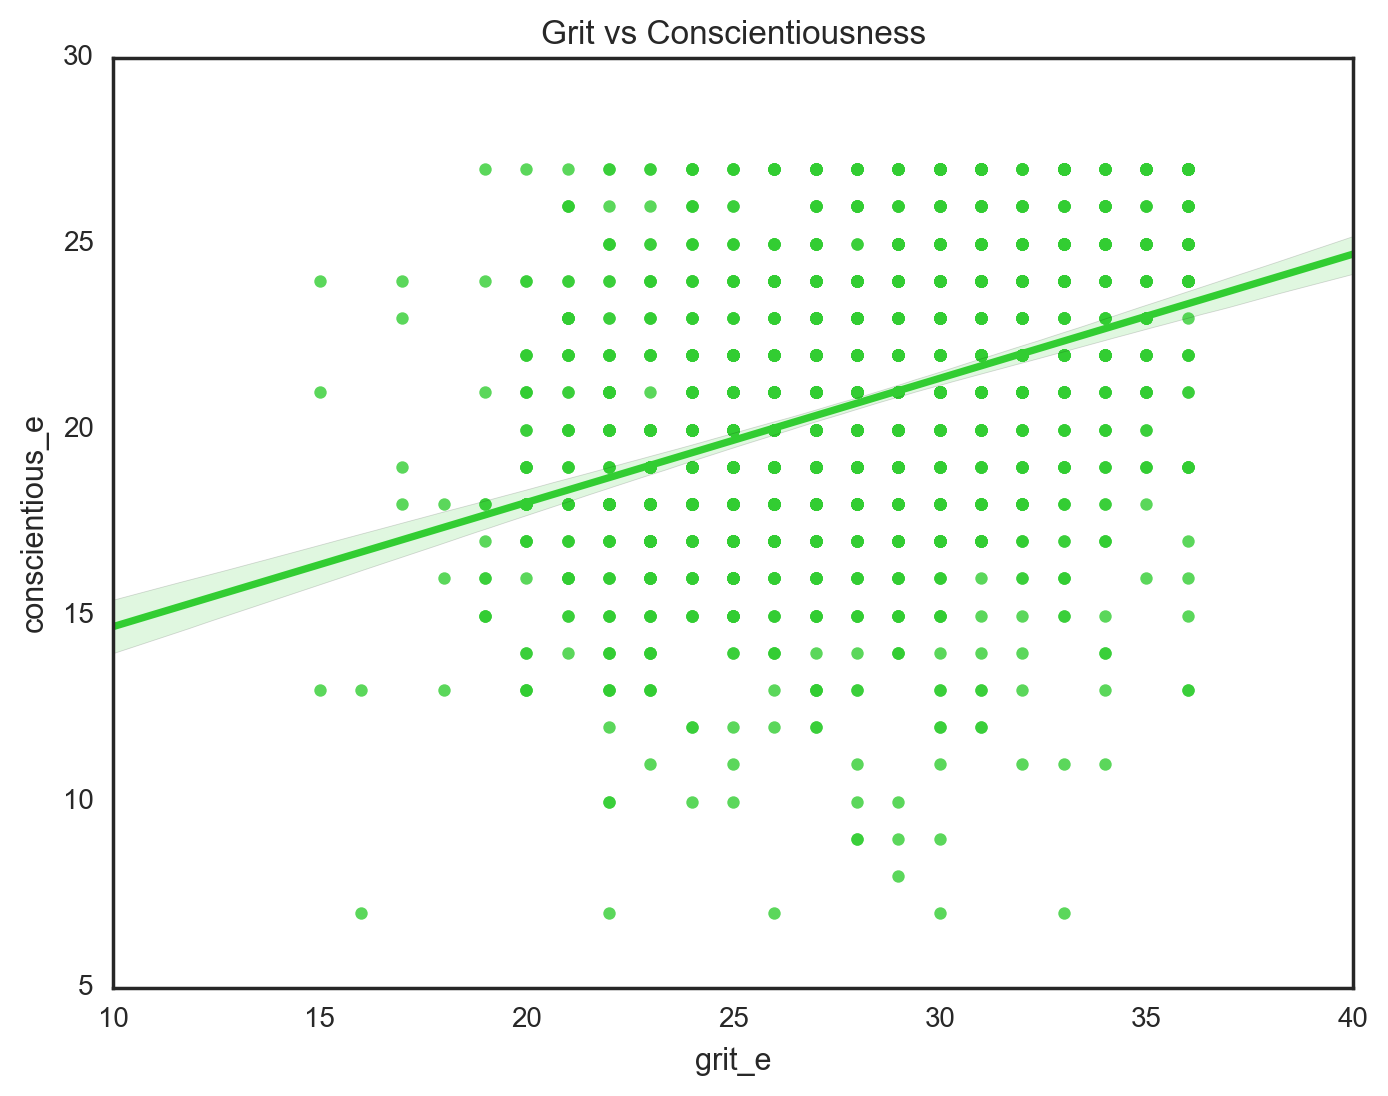

In [296]:
# Looks like conscientiousness is correlated positively with grit. A regplot would be useful
# to further explore the relationship between these two variables.

grit = df1_replaced.grit_e
conscientious = df1_replaced.conscientious_e

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(grit, conscientious, fit_reg=True, color='limegreen', ax=ax)

ax.set_title( 'Grit vs Conscientiousness')
plt.show()

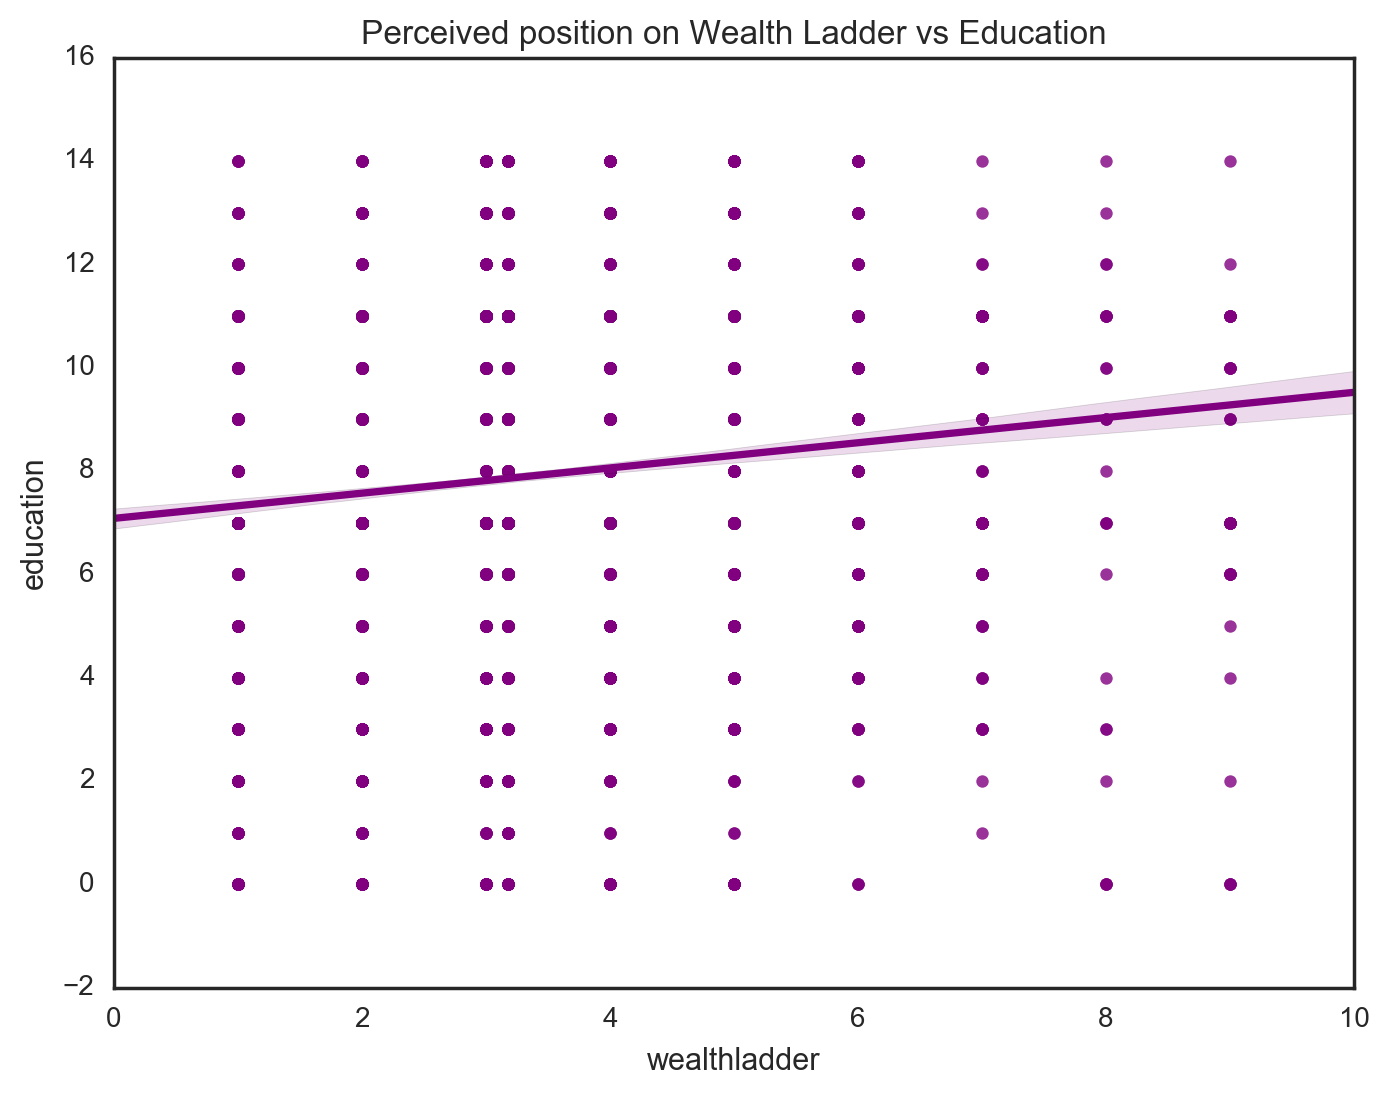

In [298]:
# Let's see what's going on with wealthladder and education.

wealthladder = df1_replaced.wealthladder
education = df1_replaced.education

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(wealthladder, education, fit_reg=True, color='purple', ax=ax)

ax.set_title( 'Perceived position on Wealth Ladder vs Education')
plt.show()

In [ ]:
# This dataset collected a few really cool variables that asked entrepreneurs
# in the sample where they perceived themselves to be on a wealth ladder (1-9, 9 being wealthiest)
# and they were also asked to rank how caring the household was where they 
# grew up in (1-3, 3 bieng most caring). Let's make a few tables to see
# how these variables might be related to eachother.

In [300]:
df.groupby(['wealthladder'])[['hhcaring_resc_e']].mean()

,hhcaring_resc_e
wealthladder,
1.000000,2.593620
2.000000,2.660494
3.000000,2.709443
3.179414,2.454545
4.000000,2.794212
5.000000,2.804469
6.000000,2.766839
7.000000,2.753425
8.000000,2.629630


In [301]:
df.groupby(['hhcaring_resc_e'])[['wealthladder']].mean()

# This is kind of interesting. The mean  wealthladder response was equally high in hhcaring=0 and hhcaring=2 households. 
# I'm going to do one more reg plot to visualize the relationship between these two variables. 

,wealthladder
hhcaring_resc_e,
0.0,2.925401
1.0,2.404412
2.0,2.929024
3.0,3.287102


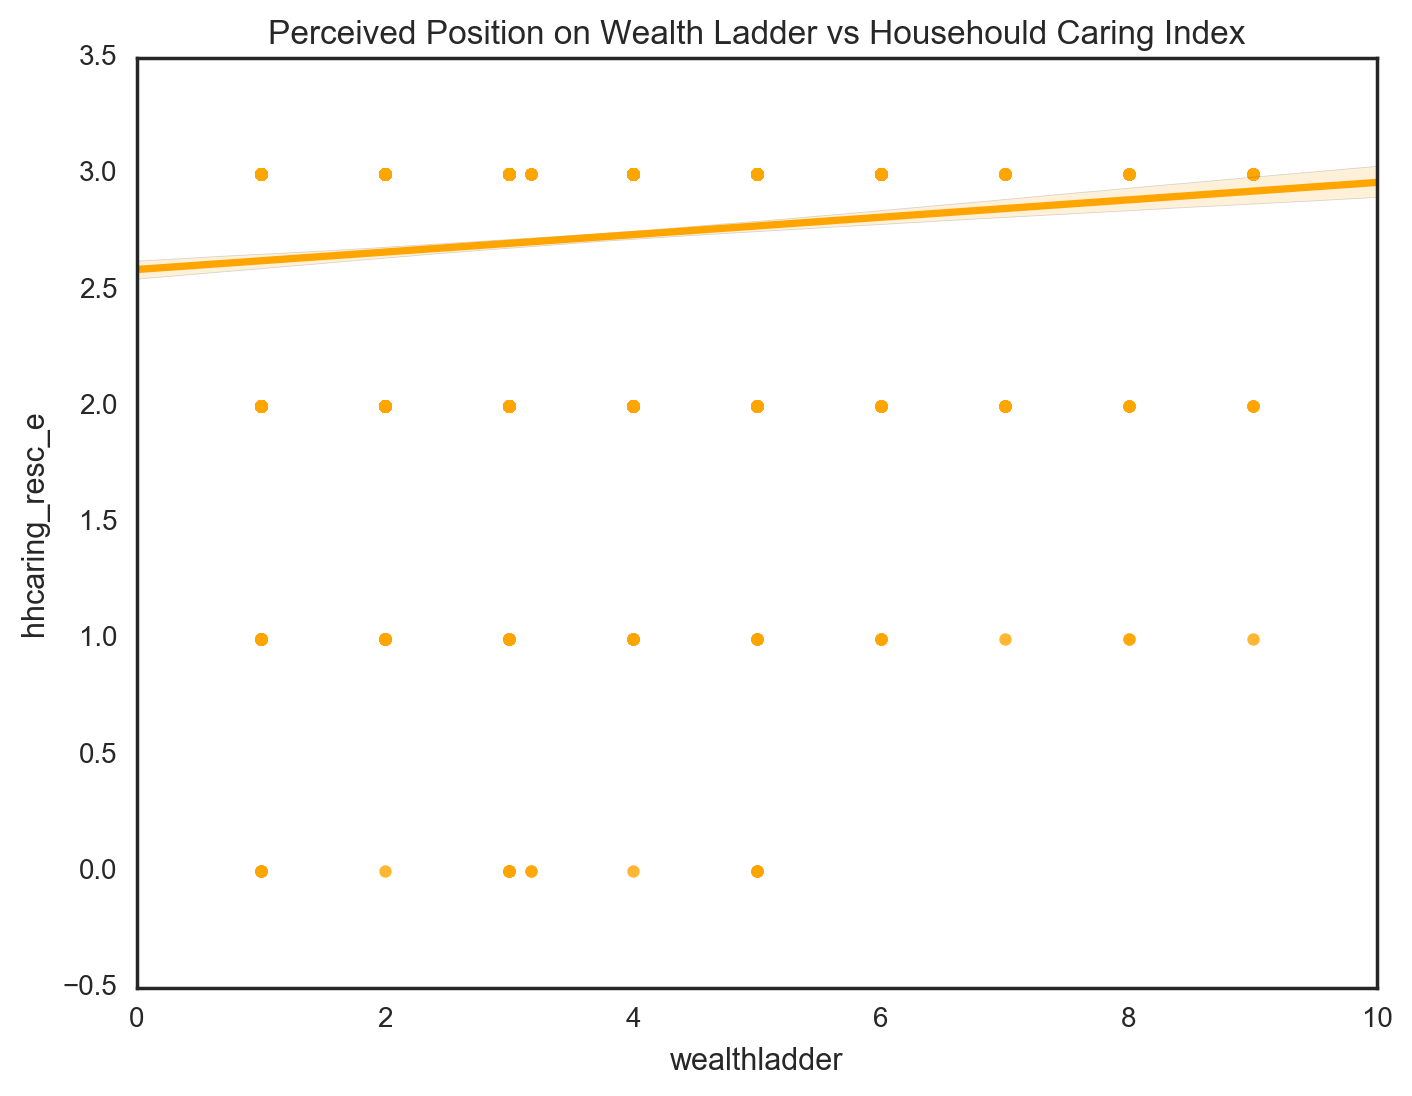

In [304]:
wealthladder = df1_replaced.wealthladder
hhcaring_resc_e = df1_replaced.hhcaring_resc_e

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(wealthladder, hhcaring_resc_e, fit_reg=True, color='orange', ax=ax)

ax.set_title( 'Perceived Position on Wealth Ladder vs Househould Caring Index')
plt.show()

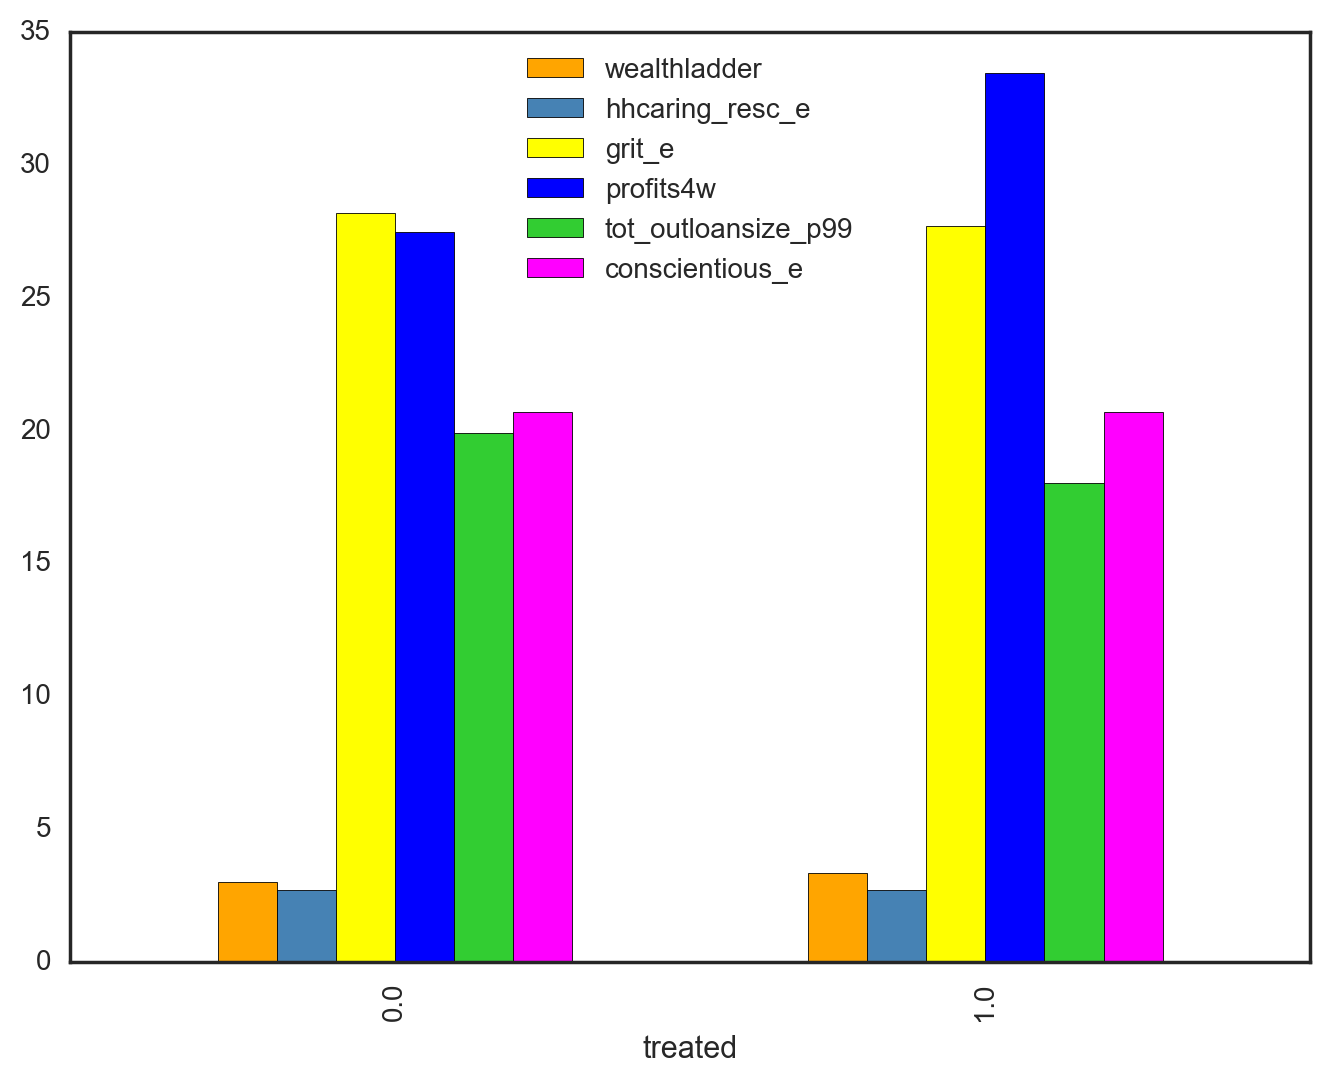

In [307]:
# Let's see how these and some of the other interesting variables are balanced based on treatment status
# We would expect profits to be higher in the treated group.

df.groupby(['treated'])['wealthladder','hhcaring_resc_e',"grit_e","profits4w",
       "tot_outloansize_p99","conscientious_e"].mean().plot(kind="bar", color=["orange","steelblue","yellow","blue","limegreen","magenta"], width=0.6)
plt.show()

# Interesting that the treatment and control group are roughly balanced, 
# but that recent profits are higher, and loans are a bit lower in the
# treated group. Wealth ladder does not seem to be very different.

In [313]:
# Let's see the top ten oldest people in the sample, and the values they have for the rest of 
# the variables in this abbreviated dataframe.

def old_folk(df, num=5, column="age"):
    return df1_replaced.sort_index(by=column)[-num:]

old_folk(df1_replaced, num=10)

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning:

by argument to sort_index is deprecated, pls use .sort_values(by=...)



,treated,age,education,training_hours_e,grit_e,profits4w,savings_6mo,wealthladder,conscientious_e,cash4w_p99,tot_outloansize_p99,distress__n_e,urban_e,hhcaring_resc_e
923,0.0,52.0,7.0,NaN,23.0,1.897661,0.0,5.000000,13.0,4.0,0.0,-0.745547,0.0,2.0
922,0.0,52.0,7.0,NaN,NaN,1.897661,0.0,3.179414,NaN,4.0,0.0,NaN,NaN,NaN
935,1.0,53.0,7.0,NaN,27.0,23.720764,0.0,5.000000,18.0,50.0,0.0,1.124118,0.0,2.0
934,1.0,53.0,7.0,0.0,NaN,23.720764,0.0,3.000000,NaN,50.0,0.0,-0.296258,0.0,2.0
937,1.0,55.0,6.0,NaN,28.0,0.000000,0.0,5.000000,20.0,0.0,0.0,0.482049,0.0,3.0
936,1.0,55.0,6.0,NaN,NaN,0.000000,0.0,3.179414,NaN,0.0,0.0,NaN,NaN,NaN
2346,0.0,56.0,6.0,0.0,NaN,33.209072,0.0,4.000000,NaN,70.0,0.0,0.918556,0.0,3.0
2347,0.0,56.0,6.0,NaN,28.0,33.209072,0.0,1.000000,24.0,70.0,0.0,0.481659,0.0,3.0
685,1.0,59.0,4.0,NaN,21.0,9.488306,0.0,5.000000,27.0,20.0,0.0,0.451900,0.0,2.0
684,1.0,59.0,4.0,640.0,NaN,9.488306,0.0,9.000000,NaN,20.0,0.0,1.625979,0.0,3.0


In [318]:
# Let's see what the four largest recorded profits over the previous month were in the 
# sample (measured in 100,000 of Ugandan Shillings).

def mad_rich(df, num=5, column="profits4w"):
    return df1_replaced.sort_index(by=column)[-num:]

mad_rich(df1_replaced, num=10)

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning:

by argument to sort_index is deprecated, pls use .sort_values(by=...)



,treated,age,education,training_hours_e,grit_e,profits4w,savings_6mo,wealthladder,conscientious_e,cash4w_p99,tot_outloansize_p99,distress__n_e,urban_e,hhcaring_resc_e
4074,1.0,25.0,7.0,420.0,NaN,379.532227,0.0,2.000000,NaN,800.0,0.00,-0.510832,0.0,3.0
1384,1.0,25.0,11.0,0.0,NaN,379.532227,0.0,2.000000,NaN,800.0,0.00,0.578486,0.0,3.0
983,0.0,28.0,9.0,NaN,17.0,379.532227,0.0,3.000000,23.0,800.0,0.50,0.255727,0.0,2.0
1347,1.0,30.0,14.0,NaN,29.0,379.532227,0.0,2.000000,22.0,800.0,5.00,0.529078,0.0,3.0
3450,1.0,25.0,7.0,320.0,NaN,398.508850,0.0,1.000000,NaN,840.0,0.00,0.704298,1.0,2.0
3451,1.0,25.0,7.0,NaN,NaN,398.508850,0.0,3.179414,NaN,840.0,0.00,NaN,NaN,NaN
3472,1.0,29.0,5.0,240.0,NaN,417.485474,0.0,2.000000,NaN,880.0,0.25,0.990702,1.0,2.0
3473,1.0,29.0,5.0,NaN,30.0,417.485474,0.0,5.000000,21.0,880.0,0.25,0.261721,0.0,3.0
4963,0.0,23.0,11.0,NaN,27.0,455.438690,0.0,4.000000,21.0,960.0,0.00,-0.610636,0.0,3.0
4962,0.0,23.0,11.0,0.0,NaN,455.438690,0.0,3.000000,NaN,960.0,0.00,-0.527857,0.0,3.0


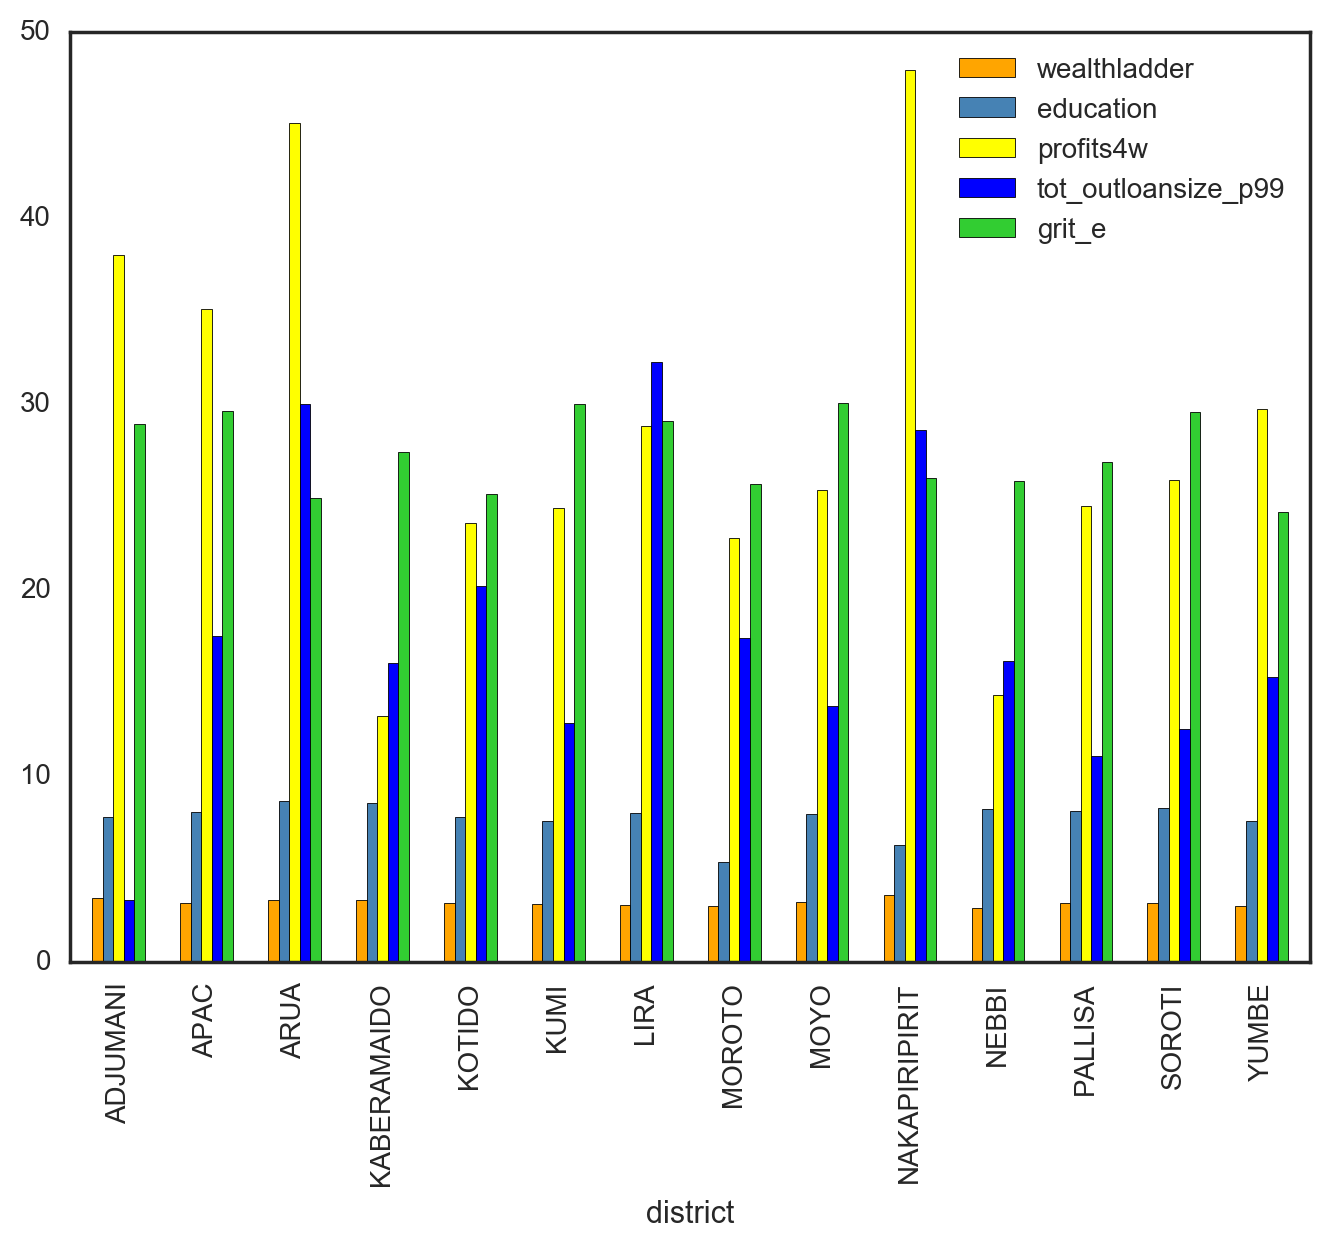

In [324]:
#Finally, let's see how the means for some of these variables differ by district.
# A note that since each variable is measured in different units, when interpreting the graph below, 
# one should only compare bars of the same color. 
# For example, respondents in Moyo did not have greater average grit than education, they are just
# measured on different scales. Moyo did however have more grit, on average, than Moroto.

df.groupby(['district'])['wealthladder','education',"profits4w",
       "tot_outloansize_p99","grit_e"].mean().plot(kind="bar", color=["orange","steelblue","yellow","blue","limegreen","magenta"], width=0.6)
plt.show()

Advanced Applied Econometrics
Project 1 Report

As you can see above, I performed an exploratory exercise on the dataset used by Nathan Fiala, Chris Blattman, and Sebastian Martinez in 2012 to assess the impact of the Youth Opportunities Program in northern Uganda. This dataset is new to me, so I tried to explore distributions of variables and relationships between variables that I thought might be interesting. Many of the relationships I found were to be expected, but some were a bit more interesting. Below is a summary of five things I learned from this exploration of the data. 

Is the gender composition of an entrepreneurial group correlated with how many people are in the group? Is the size of the group correlated to how long it has existed for?

The intervention (business grants to groups of entrepreneurs) was randomized at the group level, so I wanted to learn a bit more about the makeup of the groups in the sample, and explore correlations between their characteristics. Groups varied in how long they have been established for, with the average group existing for 3.8 years at baseline. After generating a few scatterplots that displayed the relationship between group size and group age, as well as group size and the percentage of the group that was female I didn’t find anything too interesting. I thought it might be the case that groups that were largely female may have been larger in size, but this was not the case. There was a slight negative correlation between percentage female and group size, while groups made up of 100% females ranged in size from 7-40 entrepreneurs.

I also was interested to see if the size of the group was related at all to how long it had been around for. I thought this relationship could theoretically go either way – smaller groups might be able to stay together longer, but on the other hand the longer a group exists the more potential it has to accumulate members. Indeed, the data showed no correlation between how long a group had existed and its size.

What does the baseline distribution of savings and business profits look like among individuals in the sample?

Two important baseline and outcome variables of interest in this dataset are profits earned by an individual within the last 4 weeks (profits4w) and savings accumulated by an individual within the last 6 months (savings_6mo). After generating histograms for each, the distribution for both is extremely skewed to the right. The histograms told me that most of the entrepreneurs in the sample are operating near subsistence, with recent profits and savings intensely concentrated near zero. The mean for savings_6mo was ~25,000 UGX, (roughly US $6). Even after removing outliers for savings, the distribution was still heavily skewed to the right. The same is true for profits. This is interesting because if I were to continue analyzing the data in this study, it would probably be more useful for me to consider the impact of the treatment on relative gains in savings and profits, rather than absolute gains, which would likely be minimal given how poor (monetarily) the sample is.

How are psychosocial baseline variables like grit and conscientiousness related to each other? What about self reported position on a wealth ladder and how caring the entrepreneur's childhood home was?

Among the unique and interesting variables that I wanted to explore in this dataset were variables that measured grit and conscientiousness (based on an index created from responses to qualitative psychosocial questions). Interestingly, these traits are positively correlated with each other. I found this interesting because the questions that were used to identify grit focused on perseverance, while those that were used to measure conscientiousness focused on more emotional attributes and concern for others. These traits would theoretically seem unrelated, but the data shows otherwise (see heatmap and scatterplot in the notebook).

Individuals in the survey were also asked where they would place themselves on a “wealth ladder” compared to their peers (from 1-9, with 9 representing the highest measure of relative wealth) and to rank how caring their childhood household environment was. Interestingly, how caring your childhood household was not strongly correlated to self-reported position on a wealth ladder (.12 positive correlation).

Is the sample balanced (among a subset of interesting variables) between the treatment and control groups?

I examined baseline balance for a select group of variables (grit, position on wealth ladder, profits in the preceding 4 weeks, how caring the entrepreneur’s childhood household was, conscientiousness, and the total amount of loans that each entrepreneur had out at baseline). Overall, the sample is roughly balanced between treatment and control, but the mean for recent profits is higher in the treatment group (~33,000 UGX in the treatment group versus ~27,500 UGX in the control group). The mean loan size that the entrepreneur’s had out at baseline was somewhat higher in the control group (~20,000 UGX) than in the treatment group (~17,000). This is important to know before taking the impact evaluation further, because these differences could potentially confound the coefficient on treatment status. The authors acknowledge the unbalanced nature of recent profits in their paper, but do not discuss the variation in loan size taken out by entrepreneurs in the treatment and control group. 

How do observations in different districts of northern Uganda vary in terms of a subset of interesting variables?

I thought it would also be important/interesting to consider how these variables were balanced between the different districts where the intervention took place. There were 14 districts that were part of the sample and they varied widely in terms of the variables that I chose to explore. For example, the average profits in the 4 weeks before baseline was highest in Akapiripirit district (~48,000 UGX) while in Kaberamaido, the average was only ~12,000 UGX. Average loan size at baseline ranged from ~4,000 UGX (Adjumani district) to as high as ~32,000 UGX (Lira district). The variation in grit and perceived position on a wealth ladder was much smaller across districts. Baseline differences across districts are to be expected, but these differences are still important to understand if we want to grasp a more nuanced picture of the impact of the program on individuals from different geographic locations. 
